# *Capstone project by Cornelia Blanke*
# *Time-series analysis and prediction for the HICP dataset of Eurostat*
___
# Machine Learning Task 2
> Predict all months (i.e. 12) of year 2019 out of years 2005-2018.
## Step 1: Recursive prediction of each time series individually
### Data Preparation
The data was selected and prepared during the proposal:

In [1]:
import numpy as np
import pandas as pd
import os

df_task2 = pd.read_csv(os.path.join('Data Proposal','df_task2.csv'), index_col=0)
df_task2.head(10)

,COICOP,Country,2019M12,2019M11,2019M10,2019M09,2019M08,2019M07,2019M06,2019M05,...,2005M10,2005M09,2005M08,2005M07,2005M06,2005M05,2005M04,2005M03,2005M02,2005M01
7555,CP01,Switzerland,101.32,101.34,102.05,103.06,103.28,103.10,103.36,103.00,...,99.40,99.90,100.00,100.30,101.30,101.10,101.40,101.50,101.60,101.00
7558,CP01,Germany,108.40,107.90,107.40,107.80,107.90,107.80,107.40,107.30,...,79.80,80.10,80.20,80.80,81.50,81.40,81.00,81.10,80.80,80.30
7586,CP01,Romania,111.42,110.34,109.86,108.94,109.23,109.75,110.91,111.90,...,75.90,74.97,74.86,74.89,74.74,74.44,74.36,74.34,74.14,73.79
7591,CP01,Turkey,171.14,166.28,165.91,163.22,164.20,165.48,167.33,170.13,...,38.65,37.89,37.29,37.57,38.30,39.26,38.93,39.47,39.34,38.71
7592,CP01,United Kingdom,104.30,103.70,102.80,103.50,103.70,103.10,103.10,102.90,...,71.10,71.30,71.20,71.10,71.90,71.90,71.40,72.10,71.50,71.00
11008,CP03,Switzerland,117.61,118.20,117.38,115.90,111.33,107.93,120.10,122.13,...,97.70,80.90,80.90,80.90,98.20,98.20,98.20,84.10,84.10,84.10
11011,CP03,Germany,106.60,107.80,107.70,106.40,100.50,100.30,103.90,105.80,...,92.30,91.70,89.30,89.70,91.20,92.00,92.30,92.40,91.00,91.40
11039,CP03,Romania,110.90,110.75,110.48,109.59,109.11,109.02,108.96,108.81,...,79.83,79.32,79.12,78.99,78.88,78.68,78.49,78.24,77.95,77.75
11044,CP03,Turkey,151.87,154.83,150.78,134.98,132.16,133.64,138.06,140.25,...,64.44,59.58,58.37,61.07,65.85,65.54,59.76,56.70,58.60,63.40
11045,CP03,United Kingdom,104.00,106.00,104.90,103.90,100.90,99.10,102.00,103.00,...,120.80,120.70,118.70,116.70,121.70,122.10,122.00,122.50,121.60,121.70


The time series are chronologically aligned from right to left but in the following tasks we need them to be aligned from top to down. After rearrangement we can also convert the index to a DatetimeIndex:

In [2]:
# Rearrange data
df_task2 = df_task2.iloc[:,:1:-1].T.set_axis(df_task2['COICOP'] +' '+ df_task2['Country'], axis=1, inplace=False)
df_task2.index = pd.to_datetime(df_task2.index, format ='%YM%m')
df_task2.head(10)

,CP01 Switzerland,CP01 Germany,CP01 Romania,CP01 Turkey,CP01 United Kingdom,CP03 Switzerland,CP03 Germany,CP03 Romania,CP03 Turkey,CP03 United Kingdom,CP08 Switzerland,CP08 Germany,CP08 Romania,CP08 Turkey,CP08 United Kingdom,CP10 Switzerland,CP10 Germany,CP10 Romania,CP10 Turkey,CP10 United Kingdom
2005-01-01,101.0,80.3,73.79,38.71,71.0,84.1,91.4,77.75,63.40,121.7,137.9,120.0,75.66,81.67,87.7,85.6,81.5,58.48,50.41,39.9
2005-02-01,101.6,80.8,74.14,39.34,71.5,84.1,91.0,77.95,58.60,121.6,137.9,120.0,80.42,81.83,87.9,85.6,81.7,58.22,50.19,39.9
2005-03-01,101.5,81.1,74.34,39.47,72.1,84.1,92.4,78.24,56.70,122.5,137.7,120.0,79.19,82.07,87.8,85.6,81.9,57.40,50.13,39.9
2005-04-01,101.4,81.0,74.36,38.93,71.4,98.2,92.3,78.49,59.76,122.0,137.7,120.0,79.26,81.87,87.9,85.6,82.0,57.16,50.09,39.9
2005-05-01,101.1,81.4,74.44,39.26,71.9,98.2,92.0,78.68,65.54,122.1,137.7,119.4,79.44,82.61,87.5,85.6,82.0,57.18,50.27,39.9
2005-06-01,101.3,81.5,74.74,38.30,71.9,98.2,91.2,78.88,65.85,121.7,125.9,119.3,79.63,82.04,87.7,85.6,82.0,57.28,51.91,39.9
2005-07-01,100.3,80.8,74.89,37.57,71.1,80.9,89.7,78.99,61.07,116.7,123.2,119.3,78.83,81.88,87.0,85.6,82.1,57.22,52.38,39.9
2005-08-01,100.0,80.2,74.86,37.29,71.2,80.9,89.3,79.12,58.37,118.7,123.2,119.1,76.95,82.15,87.4,85.6,82.1,57.02,52.75,39.9
2005-09-01,99.9,80.1,74.97,37.89,71.3,80.9,91.7,79.32,59.58,120.7,122.3,118.5,77.01,82.67,87.3,86.9,82.4,57.62,54.06,40.7
2005-10-01,99.4,79.8,75.90,38.65,71.1,97.7,92.3,79.83,64.44,120.8,122.3,117.8,79.22,83.68,87.1,86.9,82.6,62.47,54.11,41.8


In order to be able to quickly process all time series in the same manner, I will store them in a way that I can easily loop over them. So I will build a three-dimensional numpy array `X` where `X[i]` is the i-th feature matrix encompassing 12 lags and a two-dimensional numpy array `y` where `y[i]` is the i-th target vector, i = 0, ..., 19.

In [3]:
# Create lag feature matrix
X=[]
for col in df_task2.columns:
    # build feature matrix for time series in column 'col'
    X_col = df_task2[col].shift(periods=12).values
    for lag in np.arange(11,0,-1):
        X_col = np.c_[X_col, df_task2[col].shift(periods=lag).values]
    
    X.append(X_col[12:])         # the first 12 rows of 'X_col' contain NaN and need to be dropped
    
X=np.array(X)                    # convert list to numpy array

# Extract targets
y = df_task2.iloc[12:].T.values
        
print('Shape X: ', np.shape(X))
print('Shape y: ', np.shape(y))

Shape X:  (20, 168, 12)
Shape y:  (20, 168)


In [4]:
# For example 'CP01 Switzerland': features and target
pd.DataFrame(np.c_[X[0], y[0]]).head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,101.0,101.6,101.5,101.4,101.1,101.3,100.3,100.0,99.9,99.4,99.3,99.2,100.0
1,101.6,101.5,101.4,101.1,101.3,100.3,100.0,99.9,99.4,99.3,99.2,100.0,100.6
2,101.5,101.4,101.1,101.3,100.3,100.0,99.9,99.4,99.3,99.2,100.0,100.6,100.2
3,101.4,101.1,101.3,100.3,100.0,99.9,99.4,99.3,99.2,100.0,100.6,100.2,100.2
4,101.1,101.3,100.3,100.0,99.9,99.4,99.3,99.2,100.0,100.6,100.2,100.2,100.3
5,101.3,100.3,100.0,99.9,99.4,99.3,99.2,100.0,100.6,100.2,100.2,100.3,100.7
6,100.3,100.0,99.9,99.4,99.3,99.2,100.0,100.6,100.2,100.2,100.3,100.7,100.5
7,100.0,99.9,99.4,99.3,99.2,100.0,100.6,100.2,100.2,100.3,100.7,100.5,100.8
8,99.9,99.4,99.3,99.2,100.0,100.6,100.2,100.2,100.3,100.7,100.5,100.8,101.8
9,99.4,99.3,99.2,100.0,100.6,100.2,100.2,100.3,100.7,100.5,100.8,101.8,100.3


The last 12 rows of `X[i]` and `y[i]` contain the data of 2019. As the goal is to predict year 2019 out of the years 2005-2018 that is the test set. But attention, as we want to predict year 2019 recursively we only need january 2019 as the starting test set. If needed we can split the training data into the pure pre-training and the validation set.

In [5]:
X_train = X[:,:-12]         # belonging to years 2005-2018
X_test = X[:,[-12]]         # belonging to only january 2019

y_train = y[:,:-12]         # years 2005-2018
y_test = y[:,-12:]          # full year 2019

display(np.shape(X_train))
display(np.shape(X_test))
display(np.shape(y_train))
display(np.shape(y_test))

(20, 156, 12)

(20, 1, 12)

(20, 156)

(20, 12)

### Baseline
A simple baseline model could be to predict a year out of the value of the previous december. This will be called "Baseline 1" here. As we have seen during the EDA that many indices show at least a bit of seasonality, a more advanced baseline could be to predict a year with the monthly values of the previous year. This will be called "Baseline 2".

The MAE is computed on the test set, once for each index separately and once as a total MAE.

In [6]:
from sklearn.metrics import mean_absolute_error as MAE

In [7]:
# Compute baseline 1 for 2019
mae_baseline1 = [MAE(np.full(12,y_train[i,-1]), y_test[i]) for i in np.arange(df_task2.shape[1])]
total_mae_baseline1 = np.mean(mae_baseline1)

print('MAE Baseline 1:')
for i in np.arange(len(mae_baseline1)):
    print(df_task2.columns[i],'{:.2f}'.format(mae_baseline1[i]))
print('\nTotal MAE Baseline 1: {:.2f}'.format(total_mae_baseline1))

MAE Baseline 1:
CP01 Switzerland 0.73
CP01 Germany 1.19
CP01 Romania 4.33
CP01 Turkey 12.80
CP01 United Kingdom 0.72
CP03 Switzerland 4.44
CP03 Germany 2.68
CP03 Romania 1.39
CP03 Turkey 10.54
CP03 United Kingdom 2.55
CP08 Switzerland 0.56
CP08 Germany 0.53
CP08 Romania 4.13
CP08 Turkey 1.31
CP08 United Kingdom 2.41
CP10 Switzerland 0.39
CP10 Germany 1.04
CP10 Romania 1.45
CP10 Turkey 11.61
CP10 United Kingdom 0.87

Total MAE Baseline 1: 3.28


In [8]:
# Compute baseline 2 for 2019
mae_baseline2 = [MAE(y_train[i,-12:], y_test[i]) for i in np.arange(df_task2.shape[1])]
total_mae_baseline2 = np.mean(mae_baseline2)

print('MAE Baseline 2:')
for i in np.arange(len(mae_baseline2)):
    print(df_task2.columns[i],'{:.2f}'.format(mae_baseline2[i]))
print('\nTotal MAE Baseline 2: {:.2f}'.format(total_mae_baseline2))

MAE Baseline 2:
CP01 Switzerland 0.81
CP01 Germany 1.31
CP01 Romania 5.87
CP01 Turkey 27.32
CP01 United Kingdom 1.37
CP03 Switzerland 1.50
CP03 Germany 1.82
CP03 Romania 3.08
CP03 Turkey 7.35
CP03 United Kingdom 1.08
CP08 Switzerland 0.96
CP08 Germany 0.77
CP08 Romania 4.50
CP08 Turkey 7.02
CP08 United Kingdom 4.11
CP10 Switzerland 0.78
CP10 Germany 1.50
CP10 Romania 3.71
CP10 Turkey 17.80
CP10 United Kingdom 3.41

Total MAE Baseline 2: 4.80


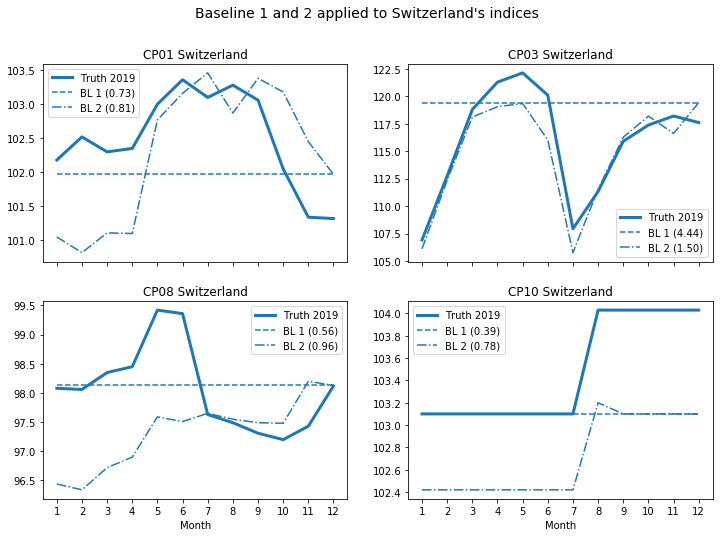

In [9]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True)
plt.suptitle("Baseline 1 and 2 applied to Switzerland's indices", fontsize=14)
for i, ax in zip([0,5,10,15], axes.ravel()):
    ax.plot(y_test[i], lw=3, label='Truth 2019')
    ax.plot(np.full(12,y_train[i,-1]), ls='--', c='tab:blue', label='BL 1 ({:.2f})'.format(mae_baseline1[i]))
    ax.plot(y_train[i,-12:], ls='-.', c='tab:blue', label='BL 2 ({:.2f})'.format(mae_baseline2[i]))
    
    ax.set_title(df_task2.columns[i])
    ax.set_xticks(np.arange(0,12))
    ax.set_xticklabels(np.arange(1,13))
    ax.legend()
    if i in [10,15]:
        ax.set_xlabel('Month')
plt.show()

### Linear Regression
I want to start with the Linear Regression model as it is one of the simplest machine learning models and it will show the full iterative workflow that we need.

As there are 20 indices to predict, we need an outer loop over all indices. Inside each outer loop we fit a Linear Regression model on the train set. Then within an inner loop we predict row-wise the data for 2019 and feed the predicted values to the feature matrix. The idea was already depicted in this schematic overview (from the proposal):

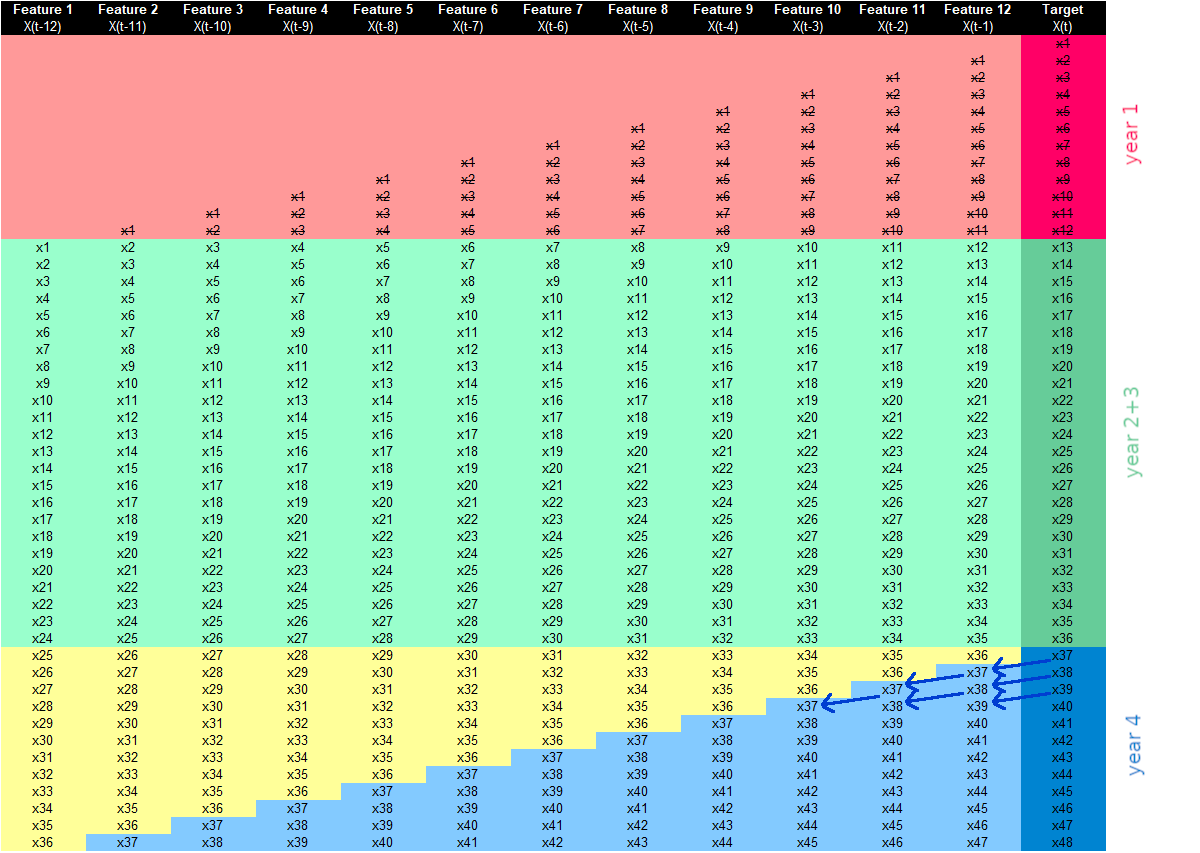

In [10]:
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()

# initialize y_pred
y_lr1_pred = np.empty((20,12))

# outer loop over all indices
for i in np.arange(df_task2.shape[1]):    
    
    # fit LR model for index i
    lr1.fit(X_train[i], y_train[i])
    
    # create a local copy
    X_pred = X_test[i].copy()
    
    # inner loop over all months
    for month in np.arange(12):
        
        # predict month
        y_lr1_pred[i,month] = lr1.predict(X_pred)
        
        # shift data by 1 to the left, append y_pred, reshape to (1,12)
        X_pred = np.append(X_pred[:,1:], y_lr1_pred[i,month]).reshape(1,12)  

In [11]:
# Compute MAE LR1 for 2019
mae_lr1 = [MAE(y_lr1_pred[i], y_test[i]) for i in np.arange(df_task2.shape[1])]
total_mae_lr1 = np.mean(mae_lr1)

print('MAE Linear Regression:')
for i in np.arange(len(mae_lr1)):
    print(df_task2.columns[i],'{:.2f}'.format(mae_lr1[i]))
print('\nTotal MAE Linear Regression: {:.2f}'.format(total_mae_lr1))

MAE Linear Regression:
CP01 Switzerland 0.63
CP01 Germany 0.63
CP01 Romania 4.29
CP01 Turkey 8.00
CP01 United Kingdom 0.27
CP03 Switzerland 2.91
CP03 Germany 1.11
CP03 Romania 0.38
CP03 Turkey 8.08
CP03 United Kingdom 1.63
CP08 Switzerland 0.49
CP08 Germany 0.16
CP08 Romania 3.82
CP08 Turkey 0.53
CP08 United Kingdom 0.89
CP10 Switzerland 0.29
CP10 Germany 1.26
CP10 Romania 1.15
CP10 Turkey 4.98
CP10 United Kingdom 2.27

Total MAE Linear Regression: 2.19


The Linear Regression model does not need any additional parameters, i.e. there is nothing that has to be validated and optimized. Its overall performance - measured by the total MAE on the test set - is better than both baseline models.

### Support Vector Regression with RBF Kernel
The SVR model with RBF kernel is a nonlinear model. There are two parameters $C$ and $\varepsilon$ that need to be optimized. Therefore the current training set will be further split into a pretrain (years 2005-2017) and a validation set (year 2018). After determining the optimal parameters the full training set (years 2005-2018) will be used to predict year 2019. That is a bit special and in contradiction to the ordinary workflow because in time series analysis the train/validation/test sets always have to be chronologically ordered.

In [12]:
# split training set into pretrain and validation set
X_pretrain = X_train[:,:-12]     # years 2005-2017
X_val = X_train[:,[-12]]         # only january 2018

y_pretrain = y_train[:,:-12]     # years 2005-2017
y_val = y_train[:,-12:]          # full year 2018

display(np.shape(X_pretrain))
display(np.shape(X_val))
display(np.shape(y_pretrain))
display(np.shape(y_val))

(20, 144, 12)

(20, 1, 12)

(20, 144)

(20, 12)

In [13]:
# Grid search on pretrain and validation set
from sklearn.model_selection import ParameterGrid
from sklearn.svm import SVR

svr1 = SVR(kernel='rbf', gamma='scale')

grid = ParameterGrid({
    'C': np.logspace(-5, 5, num=11),
    'epsilon': np.logspace(-5, 5, num=11)
})

results = []

# loop over all parameters
for params_dict in grid:
    # Set parameters
    svr1.set_params(**params_dict)

    # initialize y_pred
    y_svr1_pred = np.empty((20,12))

    # outer loop over all indices
    for i in np.arange(df_task2.shape[1]):    

        # fit SVR model for index i
        svr1.fit(X_pretrain[i], y_pretrain[i])

        # create a local copy
        X_pred = X_val[i].copy()

        # inner loop over all months
        for month in np.arange(12):

            # predict month
            y_svr1_pred[i,month] = svr1.predict(X_pred)

            # shift data by 1 to the left, append y_pred, reshape to (1,12)
            X_pred = np.append(X_pred[:,1:], y_svr1_pred[i,month]).reshape(1,12)  

    # Compute MAE SVR1 for 2018
    mae_svr1 = [MAE(y_svr1_pred[i], y_val[i]) for i in np.arange(df_task2.shape[1])]
    params_dict['Total MAE'] = np.mean(mae_svr1)

    # Save result
    results.append(params_dict)

df_results= pd.DataFrame(results)

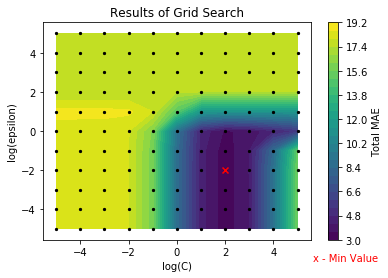

In [14]:
plt.contourf(np.log10(df_results['C'].values.reshape(11,11)), 
             np.log10(df_results['epsilon'].values.reshape(11,11)), 
             df_results['Total MAE'].values.reshape(11,11), 30)
cbar = plt.colorbar()
cbar.set_label('Total MAE')
plt.xlabel('log(C)')
plt.ylabel('log(epsilon)')
plt.title('Results of Grid Search')
plt.scatter(np.log10(df_results['C']), np.log10(df_results['epsilon']), c='k', s=5)
plt.scatter(np.log10(df_results['C'].iloc[df_results['Total MAE'].idxmin()]), 
            np.log10(df_results['epsilon'].iloc[df_results['Total MAE'].idxmin()]), 
            marker='x', c='r')
plt.figtext(0.9, 0.05, "x - Min Value",  color='r', ha ='right')
plt.show()

The contour plot shows the results of the grid search. We see that we find the lowest total MAEs for the validation set when $C=100$ and $\varepsilon\le 0.1$ with an optimum for $\varepsilon= 0.01$. However the differences are really small and an optimum of ~3.2 is still not brilliant.

In [15]:
df_results[['C','epsilon','Total MAE']].sort_values(by='Total MAE').head()

,C,epsilon,Total MAE
80,100.0,0.01000,3.216644
77,100.0,0.00001,3.239026
78,100.0,0.00010,3.239163
79,100.0,0.00100,3.240504
81,100.0,0.10000,3.242143


In [16]:
# use optimized parameters on full training and test set
svr1 = SVR(kernel='rbf', gamma='scale', C=100, epsilon=0.01)

# initialize y_pred
y_svr1_pred = np.empty((20,12))

# outer loop over all indices
for i in np.arange(df_task2.shape[1]):    
    
    # fit SVR model for index i
    svr1.fit(X_train[i], y_train[i])
    
    # create a local copy
    X_pred = X_test[i].copy()
    
    # inner loop over all months
    for month in np.arange(12):
        
        # predict month
        y_svr1_pred[i,month] = svr1.predict(X_pred)
        
        # shift data by 1 to the left, append y_pred, reshape to (1,12)
        X_pred = np.append(X_pred[:,1:], y_svr1_pred[i,month]).reshape(1,12)  
        
# Compute MAE SVR1 for 2019
mae_svr1 = [MAE(y_svr1_pred[i], y_test[i]) for i in np.arange(df_task2.shape[1])]
total_mae_svr1 = np.mean(mae_svr1)

print('MAE Support Vector Regression:')
for i in np.arange(len(mae_svr1)):
    print(df_task2.columns[i],'{:.2f}'.format(mae_svr1[i]))
print('\nTotal MAE Support Vector Regression: {:.2f}'.format(total_mae_svr1))

MAE Support Vector Regression:
CP01 Switzerland 3.76
CP01 Germany 1.14
CP01 Romania 5.42
CP01 Turkey 30.67
CP01 United Kingdom 0.67
CP03 Switzerland 1.93
CP03 Germany 1.83
CP03 Romania 1.21
CP03 Turkey 9.45
CP03 United Kingdom 2.66
CP08 Switzerland 0.49
CP08 Germany 0.28
CP08 Romania 4.28
CP08 Turkey 13.89
CP08 United Kingdom 3.90
CP10 Switzerland 0.50
CP10 Germany 1.45
CP10 Romania 0.44
CP10 Turkey 12.62
CP10 United Kingdom 1.99

Total MAE Support Vector Regression: 4.93


Even with the optimized parameters the total MAE for the test set only reaches the same magnitude as the second baseline model. This is rather disappointing for an advanced nonlinear model.

### Random Forest Regressor
Another nonlinear model that I had on my to-do list is the Random Forest Regressor. However I do not expect a good performance here in this setup because the model is not able to extrapolate values outside the range of the train set. So if we have an index that is non-stationary over time (as most of our indices are!) it is simply not possible to be predicted with this approach.

The Random Forest Regressor comes with a bunch of parameters but all of them are not able to "heal" the deficiency mentioned before. So I won't do an optimization here:

In [17]:
from sklearn.ensemble import RandomForestRegressor
rf1 = RandomForestRegressor(n_estimators=300, random_state=0)

# initialize y_pred
y_rf1_pred = np.empty((20,12))

# outer loop over all indices
for i in np.arange(df_task2.shape[1]):    
    
    # fit RF model for index i
    rf1.fit(X_train[i], y_train[i])
    
    # create a local copy
    X_pred = X_test[i].copy()
    
    # inner loop over all months
    for month in np.arange(12):
        
        # predict month
        y_rf1_pred[i,month] = rf1.predict(X_pred)
        
        # shift data by 1 to the left, append y_pred, reshape to (1,12)
        X_pred = np.append(X_pred[:,1:], y_rf1_pred[i,month]).reshape(1,12)  
        
# Compute MAE RF1 for 2019
mae_rf1 = [MAE(y_rf1_pred[i], y_test[i]) for i in np.arange(df_task2.shape[1])]
total_mae_rf1 = np.mean(mae_rf1)

print('MAE Random Forest Regressor:')
for i in np.arange(len(mae_rf1)):
    print(df_task2.columns[i],'{:.2f}'.format(mae_rf1[i]))
print('\nTotal MAE Random Forest Regressor: {:.2f}'.format(total_mae_rf1))

MAE Random Forest Regressor:
CP01 Switzerland 1.83
CP01 Germany 1.28
CP01 Romania 6.21
CP01 Turkey 14.04
CP01 United Kingdom 1.33
CP03 Switzerland 2.08
CP03 Germany 1.68
CP03 Romania 1.60
CP03 Turkey 8.92
CP03 United Kingdom 1.73
CP08 Switzerland 0.70
CP08 Germany 0.52
CP08 Romania 4.98
CP08 Turkey 3.94
CP08 United Kingdom 2.92
CP10 Switzerland 0.39
CP10 Germany 1.37
CP10 Romania 1.64
CP10 Turkey 11.72
CP10 United Kingdom 1.01

Total MAE Random Forest Regressor: 3.50


Finally let's compare the scikit-learn models that we have seen so far:
- The Linear Regression model shows the best performance and is the only one with a total MAE significantly below the one of the baseline models.
- The performance of the Support Vector Regression is disappointing - I do not have an explanation.
- In contrast I did not expect a good performance for the Random Forest Regressor model and it is even superior to the SVR.

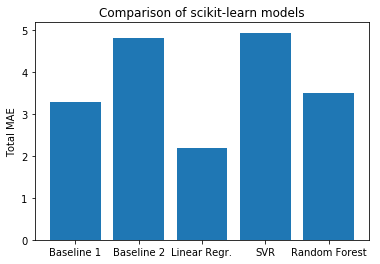

In [18]:
plt.bar(np.arange(5),[total_mae_baseline1, total_mae_baseline2, total_mae_lr1, total_mae_svr1, total_mae_rf1])
plt.xticks(ticks=np.arange(5), labels=['Baseline 1', 'Baseline 2', 'Linear Regr.', 'SVR', 'Random Forest'])
plt.ylabel('Total MAE')
plt.title("Comparison of scikit-learn models")
plt.show()

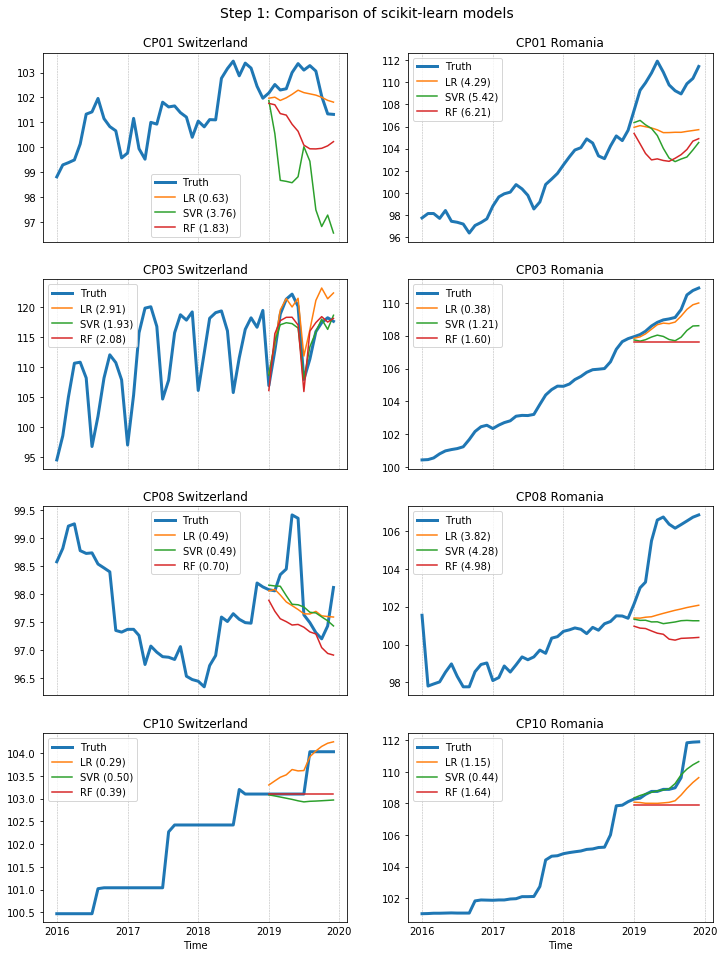

In [19]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

fig, axes = plt.subplots(4, 2, figsize=(12, 16), sharex=True)
plt.suptitle("Step 1: Comparison of scikit-learn models", fontsize=14, y=0.92)
for i, ax in zip([0,2,5,7,10,12,15,17], axes.ravel()):
    ax.plot(df_task2.iloc[-48:,i], lw=3, label='Truth')
    ax.plot(df_task2.index[-12:], y_lr1_pred[i], label='LR ({:.2f})'.format(mae_lr1[i]))
    ax.plot(df_task2.index[-12:], y_svr1_pred[i], label='SVR ({:.2f})'.format(mae_svr1[i]))
    ax.plot(df_task2.index[-12:], y_rf1_pred[i], label='RF ({:.2f})'.format(mae_rf1[i]))
    
    ax.set_title(df_task2.columns[i])
    ax.set_xticks(['2016','2017','2018','2019','2020'])
    ax.grid(axis='x', linestyle='--', linewidth=0.5)
    ax.tick_params(axis='x', which='both', length=0)
    ax.legend()
    if i in [15,17]:
        ax.set_xlabel('Time')
plt.show()

The plots above show the indices of Switzerland and Romania and the predictions of the machine learning models for 2019. In the legend I added the computed MAE in brackets. It is interesting to note:
- For 'CP01' many models fail to detect the weak seasonality that is present in the indices of both countries. All models underpredict the truth.
- The 'CP03' index of Switzerland shows a very regular pattern. All models are able to capture this kind of seasonality.
- The 'CP03' index of Romania is monotonically growing and shows only very little fluctuations. As explained above a Random Forest Regressor is not able to predict values outside the training range. So it returns just the maximum value when predicting 2019.
- Both indices of 'CP08' show sudden increases in 2019 that I cannot explain. The ML models have no explanation either and do not follow that trend.
- Both indices of 'CP10' show a yearly stepwise increase. None of the ML models is predicting a step, only some of them predict a slight kink. Again the Random Forest Regressor is just predicting constantly the maximum value of the train set.

### Dense Neural Network with One Hidden Layer

Now let's step forward to the deep learning models of tensorflow. Again I want to start slowly with a basic model: one input layer, one hidden layer, one output layer. The number of neurons in the input layer is 12 (= number of features), the number of neurons in the output layer is 1 (= number of targets), the number of neurons in the hidden layer is variable in the range 2-12 (common practice).

So the basic setup will look like:

In [20]:
# Example: Define model with 4 units in the hidden layer
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

nn1 = Sequential()
nn1.add(Dense(4, activation='relu', input_dim=12))      # number of units = 4
nn1.add(Dense(1))
nn1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 52        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


Besides the number of units in the hidden layer there are some more parameters that need to be optimized: batch size and number of epochs during training, or the learning rate in the iterative solver. In addition it is not really obvious if and how to standardize the data. As the features are exactly the lagged targets and due to the iterative process for the prediction of future values it does not make sense to scale each feature individually. So I tried out different simplified settings and found out:
- the convergence during training is poor if I do not apply scaling at all
- it is also poor if I simply scale all values by 0.01 (thus all values would be in the order of 1)
- it is much better if I substract 100 from all values (thus all values would be more or less centered around 0)
- finally I decided to compute the mean and the standard deviation of `y_train` and use those constants for the scaling of the features and the targets (the latter was important, too!)

Below is an algorithm that varies the batch sizes and the number of units in the hidden layer. It loops over all indices and outputs a figure showing the pre-training and validation loss curves for all parameter combinations. The figures are saved in `Data Project\DenseNN1`, thus it is not necessary to rerun the computation. As this is only a qualitative and preliminary study I did not implement the iterative predictor for the validation set but used instead the built-in 'validation_data' option of the `.fit()` method.

In [21]:
# HUGE PARAMETER VARIATION
# OUTPUT SAVED TO 'Data Project\DenseNN1'
# UNCOMMENT WITH Ctrl+/ IF YOU WANT TO RUN IT


# parameter study of units in hidden layer and batch size
from tensorflow.keras import optimizers
import tensorflow.keras.backend as K
import time

# # Make folder
# try:       
#     os.makedirs(os.path.join('Data Project', 'DenseNN1')) 
# except FileExistsError:
#     pass

# # Set index to investigate
# for i in np.arange(df_task2.shape[1]):
#     # Evaluate mean and std
#     mu = np.mean(y_pretrain[i])
#     sigma =np.std(y_pretrain[i])

#     fig, axes = plt.subplots(6, 4, figsize=(12, 14), sharex=True, sharey=True)
#     fig.text(0.5, 0.08, 'Epoch', ha='center')
#     fig.text(0.2, 0.05, 'batchsize=1', ha='center')
#     fig.text(0.4, 0.05, 'batchsize=4', ha='center')
#     fig.text(0.6, 0.05, 'batchsize=12', ha='center')
#     fig.text(0.8, 0.05, 'batchsize=144', ha='center')
#     fig.text(0.08, 0.5, 'Scaled Loss Value', va='center', rotation='vertical')
#     fig.text(0.05, 0.18, '12 units', va='center', rotation='vertical')
#     fig.text(0.05, 0.3, '8 units', va='center', rotation='vertical')
#     fig.text(0.05, 0.43, '6 units', va='center', rotation='vertical')
#     fig.text(0.05, 0.57, '4 units', va='center', rotation='vertical')
#     fig.text(0.05, 0.7, '3 units', va='center', rotation='vertical')
#     fig.text(0.05, 0.82, '2 units', va='center', rotation='vertical')

#     print('\nIndex '+ str(i) +':', end=' ')
#     for m, nr_units in enumerate([2,3,4,6,8,12]):
#         for n, batchsize in enumerate([1,4,12,144]):
#             nn1 = Sequential()
#             nn1.add(Dense(nr_units, activation='relu', input_dim=12))
#             nn1.add(Dense(1))

#             # Define loss function and optimizer to track during training
#             nn1.compile(loss='mean_absolute_error', 
#                        optimizer=optimizers.Adam(lr=0.001)  # adjust learning rate if needed                   
#             )

#             # End training when accuracy stops improving
#             early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6)


#             # fit NN model for index i
#             start = time.time()
#             history = nn1.fit(
#                 x=(X_pretrain[i]-mu)/sigma, y=(y_pretrain[i]-mu)/sigma,               # pretrain set 
#                 #validation_data=(X_val[i], y_val[i,[0]]),      # only january 2018
#                 validation_data=((X_train[i,-12:]-mu)/sigma, (y_val[i]-mu)/sigma),    # full year 2018
#                 batch_size=batchsize,
#                 epochs=50,
#                 shuffle=True,
#                 #callbacks=[early_stopping],
#                 verbose=0
#             )
#             end = time.time()
#             print(4*m+n+1, end='/')
#             K.clear_session()            # very important: avoid memory blow-up

#             # Plot convergence of loss values 
#             axes[m,n].plot(history.history['loss'], label='train loss')
#             axes[m,n].plot(history.history['val_loss'], label='val loss')
#             axes[m,n].set_ylim((0,4))
#             axes[m,n].set_title('Elapsed Time: {:.1f}'.format(end-start), fontsize=10)
#             axes[m,n].legend()
#     plt.savefig(os.path.join('Data Project','DenseNN1','Index_'+str(i)))
#     plt.close(fig)

Now after going through the saved image files we can summarize the findings:
- batch size = 1: computing time is significantly higher
- batch size = 144: worst convergence/performance
- batch size = 4 or 12 and number of units = 8 or 12 show generally good performance
- bigger batch size => smoother convergence

It must be said that the deep learning training is not fully reproducible, i.e. rerunning it gives slightly different results. But overall the combination of batch size = 12 and number of units = 8 is a promising choice. So let's implement it for the prediction of the test set (year 2019) out of the training set (years 2005-2018), this time with the iterative approach that we have used before in scikit-learn models:

In [22]:
# use 8 units
nn1 = Sequential()
nn1.add(Dense(8, activation='relu', input_dim=12))
nn1.add(Dense(1))
nn1.compile(loss='mean_absolute_error', optimizer='adam')

# initialize y_pred
y_nn1_pred = np.empty((20,12))

# outer loop over all indices
for i in np.arange(df_task2.shape[1]):
    
    # Evaluate mean and std
    mu = np.mean(y_train[i])
    sigma =np.std(y_train[i])
    
    # fit NN model for index i
    nn1.fit(
        x=(X_train[i]-mu)/sigma, y=(y_train[i]-mu)/sigma,
        batch_size=12,
        epochs=50,
        shuffle=True,
        verbose=0       # suppress output
    )
    
    # create a local copy
    X_pred = X_test[i].copy()
    
    # inner loop over all months
    for month in np.arange(12):
        
        # predict month
        y_nn1_pred[i,month] = sigma * nn1.predict((X_pred-mu)/sigma) + mu
        
        # shift data by 1 to the left, append y_pred, reshape to (1,12)
        X_pred = np.append(X_pred[:,1:], y_nn1_pred[i,month]).reshape(1,12)  
        
K.clear_session()
        
# Compute MAE NN1 for 2019
mae_nn1 = [MAE(y_nn1_pred[i], y_test[i]) for i in np.arange(df_task2.shape[1])]
total_mae_nn1 = np.mean(mae_nn1)

print('MAE Dense Neural Network:')
for i in np.arange(len(mae_nn1)):
    print(df_task2.columns[i],'{:.2f}'.format(mae_nn1[i]))
print('\nTotal MAE Dense Neural Network: {:.2f}'.format(total_mae_nn1))

MAE Dense Neural Network:
CP01 Switzerland 1.14
CP01 Germany 0.35
CP01 Romania 3.48
CP01 Turkey 9.13
CP01 United Kingdom 0.75
CP03 Switzerland 4.08
CP03 Germany 1.78
CP03 Romania 0.30
CP03 Turkey 10.98
CP03 United Kingdom 1.64
CP08 Switzerland 0.55
CP08 Germany 1.04
CP08 Romania 3.97
CP08 Turkey 0.53
CP08 United Kingdom 1.48
CP10 Switzerland 0.44
CP10 Germany 1.74
CP10 Romania 1.09
CP10 Turkey 5.97
CP10 United Kingdom 1.53

Total MAE Dense Neural Network: 2.60


### Convolutional Neural Network (CNN)
Another kind of neural network is the Convolutional Neural Network (CNN). In the course we have only seen how it is used for image classification but of course it can also be used for different type of problems. An overview how it might be adapted to time series analysis can be found here: https://machinelearningmastery.com/how-to-develop-convolutional-neural-network-models-for-time-series-forecasting/ The clue is to use the `Conv1D` layer instead of a `Conv2D` layer and to add another dimension to the feature matrix. Thus a typical setup may be (cited from the link above):

In [23]:
# define model
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

cnn1 = Sequential()
cnn1.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(12, 1)))
cnn1.add(MaxPooling1D(pool_size=2))
cnn1.add(Flatten())
cnn1.add(Dense(50, activation='relu'))
cnn1.add(Dense(1))
cnn1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 11, 64)            192       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 5, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 320)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                16050     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 16,293
Trainable params: 16,293
Non-trainable params: 0
_________________________________________________________________


This example is quite complex with a lot of trainable parameters. I suppose that will be "too much" for our case. But before let's reshape the feature matrix:

In [24]:
# current shape
X_train.shape

(20, 156, 12)

In [25]:
# new shape
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_train.shape

(20, 156, 12, 1)

In [26]:
# same for X_test
display(X_test.shape)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))
display(X_test.shape)

(20, 1, 12)

(20, 1, 12, 1)

In [27]:
# quick test if it works
cnn1.compile(optimizer='adam', loss='mae')

# fit model for index 0
cnn1.fit(X_train[0], y_train[0], epochs=50, verbose=0)

# predict january 2019
display(cnn1.predict(X_test[0]))

K.clear_session()

array([[102.7347]], dtype=float32)

In [28]:
y_test[0,0]

102.18

The quick test works fine and gives a promising result without even scaling the data.

Even if we stick to the CNN architecture presented above there are tremendously many combinations of possible parameters to optimize. In the algorithm below I varied the number of filters, their kernel size and the number of units in the Dense layer. I also run it with and without a Dropout layer and changed the number of strides. I always used the same setup for all indices - if we actually wanted to be clean we would have to do this task individually for each index. I was able to improve convergence by lowering the learning rate of the solver and instead increasing the number of epochs. 

In [29]:
# HUGE PARAMETER VARIATION
# OUTPUT SAVED TO 'Data Project\CNN1'
# UNCOMMENT WITH Ctrl+/ IF YOU WANT TO RUN IT


# parameter study of number of filters and kernel size
from tensorflow.keras.layers import Dropout

# # Make folder
# try:       
#     os.makedirs(os.path.join('Data Project', 'CNN1')) 
# except FileExistsError:
#     pass

# for nr_units in [8,16,32]:
#     print('\nNumber of units: ' + str(nr_units), end='')

#     # Set index to investigate
#     for i in np.arange(df_task2.shape[1]):
#         # Evaluate mean and std
#         mu = np.mean(y_pretrain[i])
#         sigma =np.std(y_pretrain[i])

#         fig, axes = plt.subplots(3, 4, figsize=(12, 7), sharex=True, sharey=True)
#         fig.text(0.5, 0.06, 'Epoch', ha='center')
#         fig.text(0.2, 0.03, '8 filters', ha='center')
#         fig.text(0.4, 0.03, '16 filters', ha='center')
#         fig.text(0.6, 0.03, '32 filters', ha='center')
#         fig.text(0.8, 0.03, '64 filters', ha='center')
#         fig.text(0.08, 0.5, 'Scaled Loss Value', va='center', rotation='vertical')
#         fig.text(0.05, 0.25, 'kernel size 5', va='center', rotation='vertical')
#         fig.text(0.05, 0.5, 'kernel size 3', va='center', rotation='vertical')
#         fig.text(0.05, 0.75, 'kernel size 2', va='center', rotation='vertical')


#         print('\nIndex '+ str(i) +':', end=' ')
#         for m, kernelsize in enumerate([2,3,5]):
#             for n, nr_filters in enumerate([8,16,32,64]):
#                 cnn1 = Sequential()
#                 cnn1.add(Conv1D(filters=nr_filters, kernel_size=kernelsize, strides=1, activation='relu',
#                                 input_shape=(12, 1)))
#                 cnn1.add(MaxPooling1D(pool_size=2))
#                 cnn1.add(Flatten())
#                 cnn1.add(Dense(nr_units, activation='relu'))
#                 cnn1.add(Dropout(0.25))            # optional
#                 cnn1.add(Dense(1))

#                 # Define loss function and optimizer to track during training
#                 cnn1.compile(loss='mean_absolute_error', 
#                            optimizer=optimizers.Adam(lr=0.0001)  # adjust learning rate if needed                   
#                 )


#                 # fit CNN model for index i
#                 start = time.time()
#                 history = cnn1.fit(
#                     x=(X_train[i,:-12]-mu)/sigma, y=(y_pretrain[i]-mu)/sigma,               # pretrain set 
#                     validation_data=((X_train[i,-12:]-mu)/sigma, (y_val[i]-mu)/sigma),    # full year 2018
#                     batch_size=12,
#                     epochs=300,
#                     shuffle=True,
#                     #callbacks=[early_stopping],
#                     verbose=0
#                 )
#                 end = time.time()
#                 print(4*m+n+1, end='/')
#                 K.clear_session()            # very important: avoid memory blow-up

#                 # Plot convergence of loss values 
#                 axes[m,n].plot(history.history['loss'], label='train loss')
#                 axes[m,n].plot(history.history['val_loss'], label='val loss')
#                 axes[m,n].set_ylim((0,1))
#                 axes[m,n].set_title('Elapsed Time: {:.1f}'.format(end-start), fontsize=10)
#                 axes[m,n].legend()
#         plt.savefig(os.path.join('Data Project','CNN1','Units_'+str(nr_units)+'_Index_'+str(i)))
#         plt.close(fig)

After having a careful look at the saved figures I decided to use 32 filters with a kernel size of 5, and 32 units in the Dense layer. I also opted against a Dropout layer as it did not improve the validation accuracy but produced a lot of random noise.

In [30]:
# use 32 units, 32 filters, kernel size = 5 
cnn1 = Sequential()
cnn1.add(Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=(12, 1)))
cnn1.add(MaxPooling1D(pool_size=2))
cnn1.add(Flatten())
cnn1.add(Dense(32, activation='relu'))
cnn1.add(Dense(1))
cnn1.compile(loss='mae', optimizer=optimizers.Adam(lr=0.0001))

# initialize y_pred
y_cnn1_pred = np.empty((20,12))

# initialize weights
weights = np.empty((20,5,1,32))

# outer loop over all indices
for i in np.arange(df_task2.shape[1]):
    
    # Evaluate mean and std
    mu = np.mean(y_train[i])
    sigma =np.std(y_train[i])
    
    # fit CNN model for index i
    cnn1.fit(
        x=(X_train[i]-mu)/sigma, y=(y_train[i]-mu)/sigma,
        batch_size=12,
        epochs=300,
        shuffle=True,
        verbose=0       # suppress output
    )
    
    # create a local copy
    X_pred = X_test[i].copy()
    
    # inner loop over all months
    for month in np.arange(12):
        
        # predict month
        y_cnn1_pred[i,month] = sigma * cnn1.predict((X_pred-mu)/sigma) + mu
        
        # shift data by 1 to the left, append y_pred, reshape to (1,12,1)
        X_pred = np.append(X_pred[:,1:], y_cnn1_pred[i,month]).reshape(1,12,1)  
        
    # save weights
    weights[i],_ = cnn1.layers[0].get_weights()
        
K.clear_session()
        
# Compute MAE CNN1 for 2019
mae_cnn1 = [MAE(y_cnn1_pred[i], y_test[i]) for i in np.arange(df_task2.shape[1])]
total_mae_cnn1 = np.mean(mae_cnn1)

print('MAE Convolutional Neural Network:')
for i in np.arange(len(mae_cnn1)):
    print(df_task2.columns[i],'{:.2f}'.format(mae_cnn1[i]))
print('\nTotal MAE Convolutional Neural Network: {:.2f}'.format(total_mae_cnn1))

MAE Convolutional Neural Network:
CP01 Switzerland 0.58
CP01 Germany 0.97
CP01 Romania 4.85
CP01 Turkey 8.53
CP01 United Kingdom 2.10
CP03 Switzerland 2.58
CP03 Germany 1.62
CP03 Romania 0.54
CP03 Turkey 14.44
CP03 United Kingdom 1.63
CP08 Switzerland 0.59
CP08 Germany 0.24
CP08 Romania 4.80
CP08 Turkey 1.24
CP08 United Kingdom 0.87
CP10 Switzerland 0.31
CP10 Germany 1.46
CP10 Romania 0.61
CP10 Turkey 3.50
CP10 United Kingdom 0.56

Total MAE Convolutional Neural Network: 2.60


In the algorithm above we have extracted the weights of the convolutional layer. For 'CP01 Switzerland' they look like:

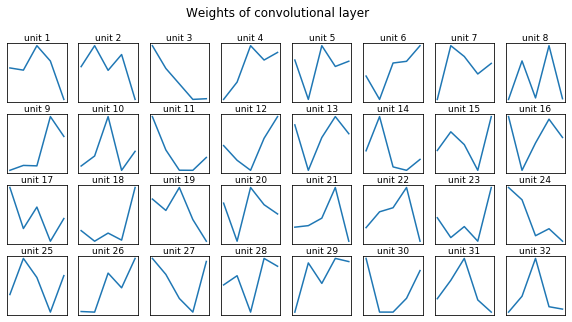

In [31]:
fig, axes = plt.subplots(4, 8, figsize=(10, 5))
plt.suptitle('Weights of convolutional layer')

for nr_filters, ax in enumerate(axes.ravel()):
    ax.set_title('unit {}'.format(nr_filters+1), size=9, pad=2)
    ax.plot(weights[0,:,:,nr_filters])       # index i=0
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

### Recurrent Neural Network (LSTM)
A third version of a basic neural network is the LSTM model. Again I found some information here: https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/ Its setup in tensorflow is rather simple but internally it does much more than a Dense layer as it exchanges information between the neurons inside that layer. It expects the same input shape of the feature matrix as the `Conv1D` layer. An example might be:

In [32]:
# define model
from tensorflow.keras.layers import LSTM

lstm1 = Sequential()
lstm1.add(LSTM(12, activation='relu', input_shape=(12,1)))              # 12 units
lstm1.add(Dense(1))
lstm1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 12)                672       
_________________________________________________________________
dense (Dense)                (None, 1)                 13        
Total params: 685
Trainable params: 685
Non-trainable params: 0
_________________________________________________________________


This time I will only do a grid search for the number of units in the LSTM layer. As the input layer contains only 12 neurons a suitable "common practice" would be all values between 1-12.

In [33]:
# HUGE PARAMETER VARIATION
# OUTPUT SAVED TO 'Data Project\LSTM1'
# UNCOMMENT WITH Ctrl+/ IF YOU WANT TO RUN IT


# parameter study of number of units

# # Make folder
# try:       
#     os.makedirs(os.path.join('Data Project', 'LSTM1')) 
# except FileExistsError:
#     pass

# # Set index to investigate
# for i in np.arange(df_task2.shape[1]):
#     # Evaluate mean and std
#     mu = np.mean(y_pretrain[i])
#     sigma =np.std(y_pretrain[i])

#     fig, axes = plt.subplots(3, 4, figsize=(12, 7), sharex=True, sharey=True)
#     fig.text(0.5, 0.06, 'Epoch', ha='center')
#     fig.text(0.08, 0.5, 'Scaled Loss Value', va='center', rotation='vertical')


#     print('\nIndex '+ str(i) +':', end=' ')
#     for nr_units, ax in zip(np.arange(1,13), axes.ravel()):
#         lstm1 = Sequential()
#         lstm1.add(LSTM(nr_units, activation='relu', input_shape=(12,1)))
#         lstm1.add(Dropout(1/6.0))     # optional
#         lstm1.add(Dense(1))

#         # Define loss function and optimizer to track during training
#         lstm1.compile(loss='mean_absolute_error', 
#                    optimizer=optimizers.Adam(lr=0.001)  # adjust learning rate if needed                   
#         )


#         # fit LSTM model for index i
#         start = time.time()
#         history = lstm1.fit(
#             x=(X_train[i,:-12]-mu)/sigma, y=(y_pretrain[i]-mu)/sigma,               # pretrain set 
#             validation_data=((X_train[i,-12:]-mu)/sigma, (y_val[i]-mu)/sigma),    # full year 2018
#             batch_size=12,
#             epochs=300,
#             shuffle=True,
#             #callbacks=[early_stopping],
#             verbose=0
#         )
#         end = time.time()
#         print(nr_units, end='/')
#         K.clear_session()            # very important: avoid memory blow-up

#         # Plot convergence of loss values 
#         ax.plot(history.history['loss'], label='train loss')
#         ax.plot(history.history['val_loss'], label='val loss')
#         ax.set_ylim((0,1))
#         ax.set_title('Units: {:} | Elapsed Time: {:.1f}'.format(nr_units, end-start), fontsize=10)
#         ax.legend()
#     plt.savefig(os.path.join('Data Project','LSTM1','Index_'+str(i)))
#     plt.close(fig)

Again I run this parameter study with and without a Dropout layer. It is hard to say wich one gives overall better results - for some indices it is the first and for some other the second. But we can see that it is advantageous to use a rather high number of units. So I decided to run the final model without a Dropout layer and 12 units in the LSTM layer.

In [34]:
# use 12 units
lstm1 = Sequential()
lstm1.add(LSTM(12, activation='relu', input_shape=(12,1)))
lstm1.add(Dense(1))
lstm1.compile(loss='mae', optimizer=optimizers.Adam(lr=0.001))

# initialize y_pred
y_lstm1_pred = np.empty((20,12))

# outer loop over all indices
for i in np.arange(df_task2.shape[1]):
    
    # Evaluate mean and std
    mu = np.mean(y_train[i])
    sigma =np.std(y_train[i])
    
    # fit LSTM model for index i
    lstm1.fit(
        x=(X_train[i]-mu)/sigma, y=(y_train[i]-mu)/sigma,
        batch_size=12,
        epochs=300,
        shuffle=True,
        verbose=0       # suppress output
    )
    
    # create a local copy
    X_pred = X_test[i].copy()
    
    # inner loop over all months
    for month in np.arange(12):
        
        # predict month
        y_lstm1_pred[i,month] = sigma * lstm1.predict((X_pred-mu)/sigma) + mu
        
        # shift data by 1 to the left, append y_pred, reshape to (1,12,1)
        X_pred = np.append(X_pred[:,1:], y_lstm1_pred[i,month]).reshape(1,12,1)  
        
K.clear_session()
        
# Compute MAE LSTM1 for 2019
mae_lstm1 = [MAE(y_lstm1_pred[i], y_test[i]) for i in np.arange(df_task2.shape[1])]
total_mae_lstm1 = np.mean(mae_lstm1)

print('MAE Recurrent Neural Network:')
for i in np.arange(len(mae_lstm1)):
    print(df_task2.columns[i],'{:.2f}'.format(mae_lstm1[i]))
print('\nTotal MAE Recurrent Neural Network: {:.2f}'.format(total_mae_lstm1))

MAE Recurrent Neural Network:
CP01 Switzerland 0.68
CP01 Germany 1.30
CP01 Romania 5.89
CP01 Turkey 51.11
CP01 United Kingdom 0.68
CP03 Switzerland 5.85
CP03 Germany 1.66
CP03 Romania 1.53
CP03 Turkey 17.62
CP03 United Kingdom 0.96
CP08 Switzerland 0.52
CP08 Germany 0.33
CP08 Romania 5.02
CP08 Turkey 11.75
CP08 United Kingdom 1.72
CP10 Switzerland 0.51
CP10 Germany 1.22
CP10 Romania 1.32
CP10 Turkey 9.49
CP10 United Kingdom 0.78

Total MAE Recurrent Neural Network: 6.00


Let's now compare all tensorflow models:

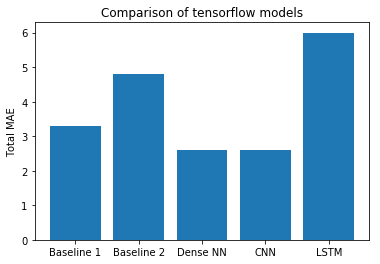

In [35]:
plt.bar(np.arange(5),[total_mae_baseline1, total_mae_baseline2, total_mae_nn1, total_mae_cnn1, total_mae_lstm1])
plt.xticks(ticks=np.arange(5), labels=['Baseline 1', 'Baseline 2', 'Dense NN', 'CNN', 'LSTM'])
plt.ylabel('Total MAE')
plt.title("Comparison of tensorflow models")
plt.show()

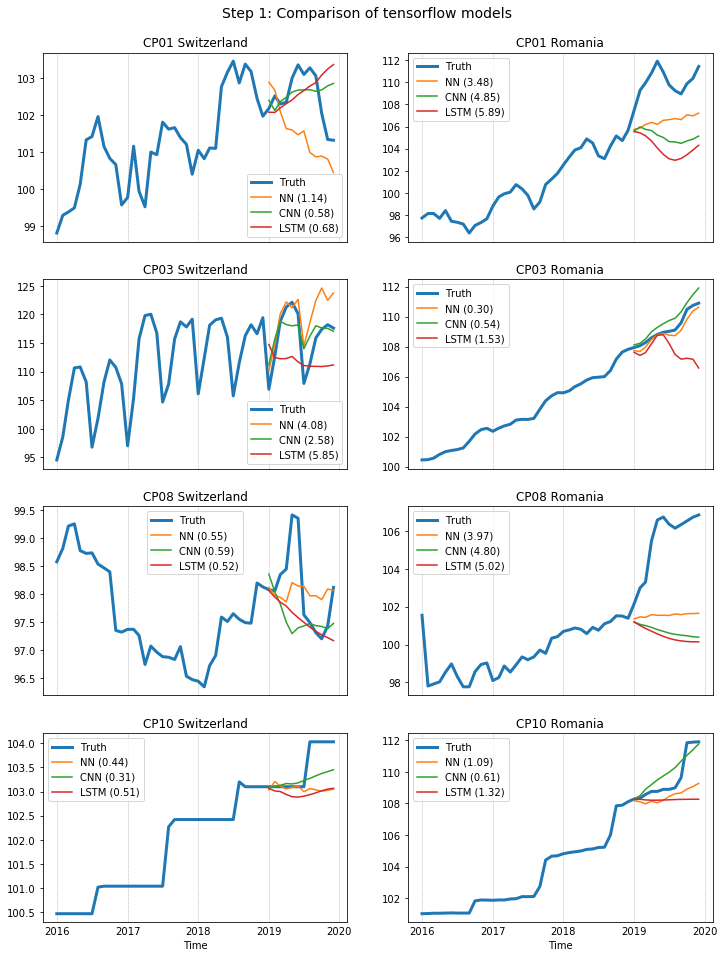

In [36]:
fig, axes = plt.subplots(4, 2, figsize=(12, 16), sharex=True)
plt.suptitle("Step 1: Comparison of tensorflow models", fontsize=14, y=0.92)
for i, ax in zip([0,2,5,7,10,12,15,17], axes.ravel()):
    ax.plot(df_task2.iloc[-48:,i], lw=3, label='Truth')
    ax.plot(df_task2.index[-12:], y_nn1_pred[i], label='NN ({:.2f})'.format(mae_nn1[i]))
    ax.plot(df_task2.index[-12:], y_cnn1_pred[i], label='CNN ({:.2f})'.format(mae_cnn1[i]))
    ax.plot(df_task2.index[-12:], y_lstm1_pred[i], label='LSTM ({:.2f})'.format(mae_lstm1[i]))
    
    ax.set_title(df_task2.columns[i])
    ax.set_xticks(['2016','2017','2018','2019','2020'])
    ax.grid(axis='x', linestyle='--', linewidth=0.5)
    ax.tick_params(axis='x', which='both', length=0)
    ax.legend()
    if i in [15,17]:
        ax.set_xlabel('Time')
plt.show()

### Conclusion of Step 1
In step 1 we have tried to predict year 2019 out of the previous year by an recursive approach. The results of this step were a bit disillusioning as the simplest model - namely the linear regression model - yielded the best accuracy with the lowest effort (for me and for the computer!). Possible problems might be:
- The train dataset is too small, especially for deep learning models. Maybe some kind of artificial data augmentation might help - similar to what we have done for the images in the course.
- There is not enough structure and too much randomness in the data. This is certainly true for some of the indices but the models also failed to predict the stepwise increase in 'CP10'.
- The time series are non-stationary. For some of the models that is a problem (e.g. Random Forest). We will see in step 3 if we can improve the performance by using the rates of change instead of the indices.
- The Total MAE might not be the best option for model comparison. The MAE metric is very intuitive but it is a bit "unfair" as it discriminates those indices that have a higher overall fluctuation (globally or per season). Maybe it would have been a better choice to base the MAE computation on the scaled indices:<br>
for every index `i`:
$\quad\mathrm{MAE}_\mathrm{scaled} = \displaystyle\frac{1}{n}\sum\limits_{j=0}^n \frac{y_j-\mu}{\sigma}-\frac{\hat{y_j}-\mu}{\sigma} = \frac{1}{n}\sum\limits_{j=0}^n \frac{y_j-\hat{y_j}}{\sigma} = \frac{1}{\sigma}\mathrm{MAE}_\mathrm{unscaled}$

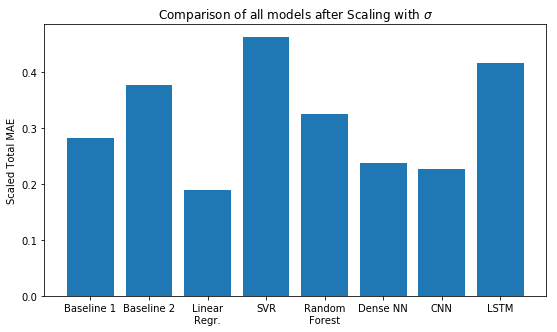

In [37]:
sigma = np.std(y_train, axis=1)       # array of all sigma[i]

plt.figure(figsize=(9,5))
plt.bar(np.arange(8),
        [np.mean(mae_baseline1/sigma), np.mean(mae_baseline2/sigma),                # baseline
         np.mean(mae_lr1/sigma), np.mean(mae_svr1/sigma), np.mean(mae_rf1/sigma),      # scikit-learn
         np.mean(mae_nn1/sigma), np.mean(mae_cnn1/sigma), np.mean(mae_lstm1/sigma)])   # tensorflow
plt.xticks(ticks=np.arange(8),
           labels=['Baseline 1', 'Baseline 2', 'Linear\nRegr.', 'SVR', 'Random\nForest', 'Dense NN', 'CNN', 'LSTM'])
plt.ylabel('Scaled Total MAE')
plt.title("Comparison of all models after Scaling with $\sigma$")
plt.show()

## Step 2: One-step multi-output prediction of each time series individually
Instead of using the recursive approach from step 1 I will now predict all months of 2019 out of all months in 2018 in one step.

The multi-target ML models will be trained to always predict the next year out of the previous year. As the number of years is very small I did not only take the calendar years from january to december into account but all different sequences of 12 months. We can also think about the multi-target models as being twelve separate models predicting the next month, the month after the next month, and so on.
### Data Preparation
We need to modify the feature matrix `X` and the target `y` which is now a matrix as well.

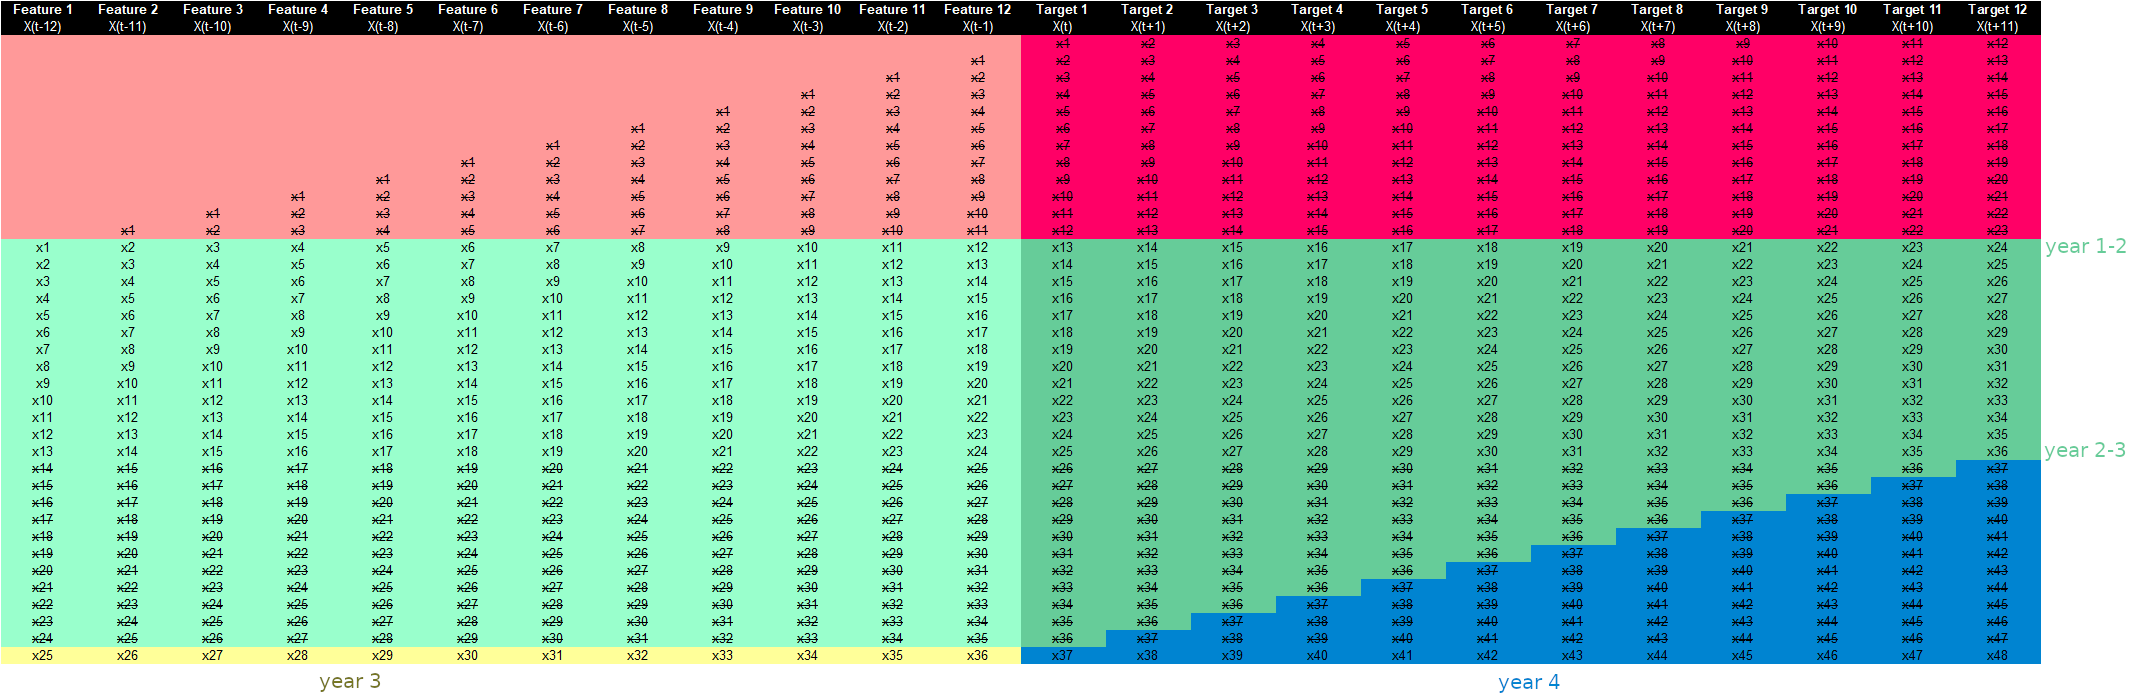

In [38]:
# Current y
y.shape

(20, 168)

In [39]:
# Create target matrix Y
Y=[]
for col in df_task2.columns:
    # build target matrix for time series in column 'col'
    Y_col = df_task2[col].values
    for lag in np.arange(1,12):
        Y_col = np.c_[Y_col, df_task2[col].shift(periods=-lag).values]
    
    Y.append(Y_col[12:-11])      # the first 12 rows and the last 11 rows need to be dropped
    
Y=np.array(Y)                    # convert list to numpy array

# Modify X in the same way
X = X[:,:-11]

print('Shape X: ', np.shape(X))
print('Shape Y: ', np.shape(Y))

Shape X:  (20, 157, 12)
Shape Y:  (20, 157, 12)


In [40]:
X_train = X[:,:-12]        # last 12 rows of Y contain test data and need to be dropped
X_test = X[:,[-1]]         # last row

Y_train = Y[:,:-12]        #  last 12 rows of Y contain test data and need to be dropped
Y_test = Y[:,[-1]]         # last row

display(np.shape(X_train))
display(np.shape(X_test))
display(np.shape(Y_train))
display(np.shape(Y_test))

(20, 145, 12)

(20, 1, 12)

(20, 145, 12)

(20, 1, 12)

### Linear Regression
The Baseline 1 and 2 do not change, so let's start with the multi-target Linear Regression model. It is really easy to set up as it fully supports multi-targets and as we do not need any more the inner loop for the recursive prediction.

In [41]:
lr2 = LinearRegression()

# initialize y_pred
Y_lr2_pred = np.empty((20,1,12))

# outer loop over all indices
for i in np.arange(df_task2.shape[1]):    
    
    # fit LR model for index i
    lr2.fit(X_train[i], Y_train[i])
        
    # predict next year
    Y_lr2_pred[i] = lr2.predict(X_test[i])
        

mae_lr2 = [MAE(Y_lr2_pred[i], Y_test[i]) for i in np.arange(df_task2.shape[1])]
total_mae_lr2 = np.mean(mae_lr2)

print('MAE Linear Regression:')
for i in np.arange(len(mae_lr2)):
    print(df_task2.columns[i],'{:.2f}'.format(mae_lr2[i]))
print('\nTotal MAE Linear Regression: {:.2f}'.format(total_mae_lr2))

MAE Linear Regression:
CP01 Switzerland 0.52
CP01 Germany 0.50
CP01 Romania 4.71
CP01 Turkey 10.69
CP01 United Kingdom 0.36
CP03 Switzerland 1.94
CP03 Germany 1.02
CP03 Romania 0.30
CP03 Turkey 7.77
CP03 United Kingdom 0.80
CP08 Switzerland 0.64
CP08 Germany 0.15
CP08 Romania 4.03
CP08 Turkey 0.93
CP08 United Kingdom 1.14
CP10 Switzerland 0.21
CP10 Germany 1.30
CP10 Romania 0.93
CP10 Turkey 4.56
CP10 United Kingdom 1.09

Total MAE Linear Regression: 2.18


### Support Vector Regression with RBF Kernel
The SVR model does not support multi-targets by itself but can be embedded into a `MultiOutputRegressor` and then be called as usual.

During grid search I will use the last 12 rows of the training data as validation data. So every month is in the first place exactly once.

In [42]:
# split training set into pretrain and validation set
X_pretrain = X_train[:,:-12]
X_val = X_train[:,-12:]          # last 12 rows
Y_pretrain = Y_train[:,:-12]
Y_val = Y_train[:,-12:]          # last 12 rows

display(np.shape(X_pretrain))
display(np.shape(X_val))
display(np.shape(Y_pretrain))
display(np.shape(Y_val))

(20, 133, 12)

(20, 12, 12)

(20, 133, 12)

(20, 12, 12)

In [43]:
# Grid search on pretrain and validation set
from sklearn.multioutput import MultiOutputRegressor

# svr2 = MultiOutputRegressor(SVR(kernel='rbf', gamma='scale'))

# grid = ParameterGrid({
#     'estimator__C': np.logspace(-5, 5, num=11),
#     'estimator__epsilon': np.logspace(-5, 5, num=11)
# })

# results = []

# # loop over all parameters
# for params_dict in grid:
#     # Set parameters
#     svr2.set_params(**params_dict)

#     # initialize y_pred
#     Y_svr2_pred = np.empty((20,12,12))

#     # outer loop over all indices
#     for i in np.arange(df_task2.shape[1]):    

#         # fit SVR model for index i
#         svr2.fit(X_pretrain[i], Y_pretrain[i])

#         # predict next year
#         Y_svr2_pred[i] = svr2.predict(X_val[i])  

#     # Compute MAE SVR2 for 2018
#     mae_svr2 = [MAE(Y_svr2_pred[i], Y_val[i]) for i in np.arange(df_task2.shape[1])]
#     params_dict['Total MAE'] = np.mean(mae_svr2)

#     # Save result
#     results.append(params_dict)

# df_results= pd.DataFrame(results)

In [44]:
# plt.contourf(np.log10(df_results['estimator__C'].values.reshape(11,11)), 
#              np.log10(df_results['estimator__epsilon'].values.reshape(11,11)), 
#              df_results['Total MAE'].values.reshape(11,11), 30)
# cbar = plt.colorbar()
# cbar.set_label('Total MAE')
# plt.xlabel('log(C)')
# plt.ylabel('log(epsilon)')
# plt.title('Results of Grid Search')
# plt.scatter(np.log10(df_results['estimator__C']), np.log10(df_results['estimator__epsilon']), c='k', s=5)
# plt.scatter(np.log10(df_results['estimator__C'].iloc[df_results['Total MAE'].idxmin()]), 
#             np.log10(df_results['estimator__epsilon'].iloc[df_results['Total MAE'].idxmin()]), 
#             marker='x', c='r')
# plt.figtext(0.9, 0.05, "x - Min Value",  color='r', ha ='right')
# plt.show()

The result looks very similar to the one in step 1 but the optimum is now found for $\varepsilon=0.1$. Unfortunately when we use those parameters we get a rather bad performance on the test set:

In [45]:
# use optimized parameters on full training and test set
svr2 = MultiOutputRegressor(SVR(kernel='rbf', gamma='scale', C=100, epsilon=0.1))

# initialize y_pred
Y_svr2_pred = np.empty((20,1,12))

# outer loop over all indices
for i in np.arange(df_task2.shape[1]):    
    
    # fit SVR model for index i
    svr2.fit(X_train[i], Y_train[i])
        
    # predict next year
    Y_svr2_pred[i] = svr2.predict(X_test[i])
        
# Compute MAE SVR2 for 2019
mae_svr2 = [MAE(Y_svr2_pred[i], Y_test[i]) for i in np.arange(df_task2.shape[1])]
total_mae_svr2 = np.mean(mae_svr2)

print('MAE Support Vector Regression:')
for i in np.arange(len(mae_svr2)):
    print(df_task2.columns[i],'{:.2f}'.format(mae_svr2[i]))
print('\nTotal MAE Support Vector Regression: {:.2f}'.format(total_mae_svr2))

MAE Support Vector Regression:
CP01 Switzerland 1.02
CP01 Germany 4.23
CP01 Romania 5.42
CP01 Turkey 64.04
CP01 United Kingdom 1.84
CP03 Switzerland 2.61
CP03 Germany 1.70
CP03 Romania 1.97
CP03 Turkey 26.97
CP03 United Kingdom 0.82
CP08 Switzerland 1.12
CP08 Germany 0.60
CP08 Romania 6.41
CP08 Turkey 14.66
CP08 United Kingdom 4.51
CP10 Switzerland 1.20
CP10 Germany 1.39
CP10 Romania 1.66
CP10 Turkey 24.61
CP10 United Kingdom 2.56

Total MAE Support Vector Regression: 8.47


Uhm, even with optimized parameters I get a result that is worse than everything before...

### Random Forest Regressor
The Random Forest Regressor from scikit-learn is able to deal with multi-targets. But just like in step 1 it is not able to extrapolate values outside the range of the training set. With the setup of step 2 which is still based on the non-stationary indices we won't heal this problem.

In [46]:
rf2 = RandomForestRegressor(n_estimators=300, random_state=0)

# initialize y_pred
Y_rf2_pred = np.empty((20,1,12))

# outer loop over all indices
for i in np.arange(df_task2.shape[1]):    
    
    # fit RF model for index i
    rf2.fit(X_train[i], Y_train[i])
        
    # predict next year
    Y_rf2_pred[i] = rf2.predict(X_test[i])
        
# Compute MAE RF2 for 2019
mae_rf2 = [MAE(Y_rf2_pred[i], Y_test[i]) for i in np.arange(df_task2.shape[1])]
total_mae_rf2 = np.mean(mae_rf2)

print('MAE Random Forest Regressor:')
for i in np.arange(len(mae_rf2)):
    print(df_task2.columns[i],'{:.2f}'.format(mae_rf2[i]))
print('\nTotal MAE Random Forest Regressor: {:.2f}'.format(total_mae_rf2))

MAE Random Forest Regressor:
CP01 Switzerland 0.49
CP01 Germany 1.54
CP01 Romania 8.81
CP01 Turkey 31.44
CP01 United Kingdom 0.97
CP03 Switzerland 3.78
CP03 Germany 2.23
CP03 Romania 3.24
CP03 Turkey 10.59
CP03 United Kingdom 1.65
CP08 Switzerland 1.09
CP08 Germany 0.85
CP08 Romania 6.46
CP08 Turkey 7.87
CP08 United Kingdom 4.50
CP10 Switzerland 0.81
CP10 Germany 0.90
CP10 Romania 3.95
CP10 Turkey 18.36
CP10 United Kingdom 3.56

Total MAE Random Forest Regressor: 5.65


### Dense Neural Network with One Hidden Layer
In order to solve multi-target problems every sequential neural network can be set up with more than one neuron in the output layer. 

I will skip the grid search here (I do not expect any new insights) and will directly work on the training and test set:

In [47]:
# use 8 units
nn2 = Sequential()
nn2.add(Dense(8, activation='relu', input_dim=12))
nn2.add(Dense(12))
nn2.compile(loss='mean_absolute_error', optimizer='adam')

# initialize y_pred
Y_nn2_pred = np.empty((20,1,12))

# outer loop over all indices
for i in np.arange(df_task2.shape[1]):
    
    # Evaluate mean and std
    mu = np.mean(Y_train[i,:,0])
    sigma =np.std(Y_train[i,:,0])
    
    # fit NN model for index i
    nn2.fit(
        x=(X_train[i]-mu)/sigma, y=(Y_train[i]-mu)/sigma,
        batch_size=12,
        epochs=50,
        shuffle=True,
        verbose=0       # suppress output
    )
        
    # predict next year
    Y_nn2_pred[i] = sigma * nn2.predict((X_test[i]-mu)/sigma) + mu
         
        
K.clear_session()
        
# Compute MAE NN2 for 2019
mae_nn2 = [MAE(Y_nn2_pred[i], Y_test[i]) for i in np.arange(df_task2.shape[1])]
total_mae_nn2 = np.mean(mae_nn2)

print('MAE Dense Neural Network:')
for i in np.arange(len(mae_nn2)):
    print(df_task2.columns[i],'{:.2f}'.format(mae_nn2[i]))
print('\nTotal MAE Dense Neural Network: {:.2f}'.format(total_mae_nn2))

MAE Dense Neural Network:
CP01 Switzerland 0.60
CP01 Germany 0.86
CP01 Romania 5.65
CP01 Turkey 9.13
CP01 United Kingdom 1.91
CP03 Switzerland 3.24
CP03 Germany 1.69
CP03 Romania 0.50
CP03 Turkey 8.15
CP03 United Kingdom 1.33
CP08 Switzerland 0.90
CP08 Germany 0.19
CP08 Romania 4.34
CP08 Turkey 1.35
CP08 United Kingdom 2.21
CP10 Switzerland 0.29
CP10 Germany 1.43
CP10 Romania 2.02
CP10 Turkey 4.58
CP10 United Kingdom 0.77

Total MAE Dense Neural Network: 2.56


### Convolutional Neural Network (CNN)
As before for the CNN and the LSTM the feature matrix must be reshaped:

In [48]:
# current shape
display(X_pretrain.shape)
display(X_val.shape)
display(X_train.shape)
display(X_test.shape)

(20, 133, 12)

(20, 12, 12)

(20, 145, 12)

(20, 1, 12)

In [49]:
# new shape
X_pretrain = X_pretrain.reshape((X_pretrain.shape[0], X_pretrain.shape[1], X_pretrain.shape[2], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], X_val.shape[2], 1))
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))
display(X_pretrain.shape)
display(X_val.shape)
display(X_train.shape)
display(X_test.shape)

(20, 133, 12, 1)

(20, 12, 12, 1)

(20, 145, 12, 1)

(20, 1, 12, 1)

In [50]:
# HUGE PARAMETER VARIATION
# OUTPUT SAVED TO 'Data Project\CNN2'
# UNCOMMENT WITH Ctrl+/ IF YOU WANT TO RUN IT


# parameter study of number of filters and kernel size

# # Make folder
# try:       
#     os.makedirs(os.path.join('Data Project', 'CNN2')) 
# except FileExistsError:
#     pass

# for nr_units in [8,16,32]:
#     print('\nNumber of units: ' + str(nr_units), end='')

#     # Set index to investigate
#     for i in np.arange(df_task2.shape[1]):
#         # Evaluate mean and std
#         mu = np.mean(Y_pretrain[i,:,0])
#         sigma =np.std(Y_pretrain[i,:,0])

#         fig, axes = plt.subplots(3, 4, figsize=(12, 7), sharex=True, sharey=True)
#         fig.text(0.5, 0.06, 'Epoch', ha='center')
#         fig.text(0.2, 0.03, '8 filters', ha='center')
#         fig.text(0.4, 0.03, '16 filters', ha='center')
#         fig.text(0.6, 0.03, '32 filters', ha='center')
#         fig.text(0.8, 0.03, '64 filters', ha='center')
#         fig.text(0.08, 0.5, 'Scaled Loss Value', va='center', rotation='vertical')
#         fig.text(0.05, 0.25, 'kernel size 5', va='center', rotation='vertical')
#         fig.text(0.05, 0.5, 'kernel size 3', va='center', rotation='vertical')
#         fig.text(0.05, 0.75, 'kernel size 2', va='center', rotation='vertical')


#         print('\nIndex '+ str(i) +':', end=' ')
#         for m, kernelsize in enumerate([2,3,5]):
#             for n, nr_filters in enumerate([8,16,32,64]):
#                 cnn2 = Sequential()
#                 cnn2.add(Conv1D(filters=nr_filters, kernel_size=kernelsize, activation='relu', input_shape=(12, 1)))
#                 cnn2.add(MaxPooling1D(pool_size=2))
#                 cnn2.add(Flatten())
#                 cnn2.add(Dense(nr_units, activation='relu'))
#                 #cnn2.add(Dropout(0.25))            # optional
#                 cnn2.add(Dense(12))

#                 # Define loss function and optimizer to track during training
#                 cnn2.compile(loss='mean_absolute_error', 
#                            optimizer=optimizers.Adam(lr=0.0001)  # adjust learning rate if needed                   
#                 )


#                 # fit CNN model for index i
#                 start = time.time()
#                 history = cnn2.fit(
#                     x=(X_pretrain[i]-mu)/sigma, y=(Y_pretrain[i]-mu)/sigma,
#                     validation_data=((X_val[i]-mu)/sigma, (Y_val[i]-mu)/sigma),
#                     batch_size=12,
#                     epochs=300,
#                     shuffle=True,
#                     #callbacks=[early_stopping],
#                     verbose=0
#                 )
#                 end = time.time()
#                 print(4*m+n+1, end='/')
#                 K.clear_session()            # very important: avoid memory blow-up

#                 # Plot convergence of loss values 
#                 axes[m,n].plot(history.history['loss'], label='train loss')
#                 axes[m,n].plot(history.history['val_loss'], label='val loss')
#                 axes[m,n].set_ylim((0,1))
#                 axes[m,n].set_title('Elapsed Time: {:.1f}'.format(end-start), fontsize=10)
#                 axes[m,n].legend()
#         plt.savefig(os.path.join('Data Project','CNN2','Units_'+str(nr_units)+'_Index_'+str(i)))
#         plt.close(fig)

In [51]:
# use 32 units, 32 filters, kernel size = 5 
cnn2 = Sequential()
cnn2.add(Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=(12, 1)))
cnn2.add(MaxPooling1D(pool_size=2))
cnn2.add(Flatten())
cnn2.add(Dense(32, activation='relu'))
cnn2.add(Dense(12))
cnn2.compile(loss='mae', optimizer=optimizers.Adam(lr=0.0001))

# initialize y_pred
Y_cnn2_pred = np.empty((20,1,12))

# outer loop over all indices
for i in np.arange(df_task2.shape[1]):
    
    # Evaluate mean and std
    mu = np.mean(Y_train[i,:,0])
    sigma =np.std(Y_train[i,:,0])
    
    # fit CNN model for index i
    cnn2.fit(
        x=(X_train[i]-mu)/sigma, y=(Y_train[i]-mu)/sigma,
        batch_size=12,
        epochs=300,
        shuffle=True,
        verbose=0       # suppress output
    )
        
    # predict next year
    Y_cnn2_pred[i] = sigma * cnn2.predict((X_test[i]-mu)/sigma) + mu    
        
K.clear_session()
        
# Compute MAE CNN2 for 2019
mae_cnn2 = [MAE(Y_cnn2_pred[i], Y_test[i]) for i in np.arange(df_task2.shape[1])]
total_mae_cnn2 = np.mean(mae_cnn2)

print('MAE Convolutional Neural Network:')
for i in np.arange(len(mae_cnn2)):
    print(df_task2.columns[i],'{:.2f}'.format(mae_cnn2[i]))
print('\nTotal MAE Convolutional Neural Network: {:.2f}'.format(total_mae_cnn2))

MAE Convolutional Neural Network:
CP01 Switzerland 0.67
CP01 Germany 0.57
CP01 Romania 5.85
CP01 Turkey 11.08
CP01 United Kingdom 2.36
CP03 Switzerland 3.32
CP03 Germany 1.60
CP03 Romania 0.15
CP03 Turkey 10.17
CP03 United Kingdom 0.81
CP08 Switzerland 1.43
CP08 Germany 0.38
CP08 Romania 5.06
CP08 Turkey 2.21
CP08 United Kingdom 2.43
CP10 Switzerland 0.16
CP10 Germany 1.21
CP10 Romania 1.47
CP10 Turkey 1.50
CP10 United Kingdom 1.04

Total MAE Convolutional Neural Network: 2.67


### Recurrent Neural Network (LSTM)
This time I tried out some additional options in the LSTM layer but did not get a significant improvement:

In [52]:
# HUGE PARAMETER VARIATION
# OUTPUT SAVED TO 'Data Project\LSTM1'
# UNCOMMENT WITH Ctrl+/ IF YOU WANT TO RUN IT


# parameter study of number of units
from tensorflow.keras import regularizers

# # Make folder
# try:       
#     os.makedirs(os.path.join('Data Project', 'LSTM2')) 
# except FileExistsError:
#     pass

# # Set index to investigate
# for i in np.arange(df_task2.shape[1]):
#     # Evaluate mean and std
#     mu = np.mean(Y_pretrain[i,:,0])
#     sigma =np.std(Y_pretrain[i,:,0])

#     fig, axes = plt.subplots(3, 4, figsize=(12, 7), sharex=True, sharey=True)
#     fig.text(0.5, 0.06, 'Epoch', ha='center')
#     fig.text(0.08, 0.5, 'Scaled Loss Value', va='center', rotation='vertical')


#     print('\nIndex '+ str(i) +':', end=' ')
#     for nr_units, ax in zip(np.arange(1,13), axes.ravel()):
#         lstm2 = Sequential()
#         lstm2.add(LSTM(nr_units, activation='relu', dropout=0.125, #recurrent_dropout=0.5,
#                        kernel_regularizer=regularizers.l2(0.001), 
#                        #recurrent_regularizer=regularizers.l2(0.001), 
#                        #bias_regularizer=regularizers.l2(0.001), 
#                        #activity_regularizer=regularizers.l2(0.01),
#                        input_shape=(12,1)))
#         lstm2.add(Dropout(1/12.0))     # optional
#         lstm2.add(Dense(12))

#         # Define loss function and optimizer to track during training
#         lstm2.compile(loss='mean_absolute_error', 
#                    optimizer=optimizers.Adam(lr=0.001)  # adjust learning rate if needed                   
#         )


#         # fit LSTM model for index i
#         start = time.time()
#         history = lstm2.fit(
#             x=(X_pretrain[i]-mu)/sigma, y=(Y_pretrain[i]-mu)/sigma,        # pretrain set 
#             validation_data=((X_val[i]-mu)/sigma, (Y_val[i]-mu)/sigma),    # full year 2018
#             batch_size=12,
#             epochs=300,
#             shuffle=True,
#             #callbacks=[early_stopping],
#             verbose=0
#         )
#         end = time.time()
#         print(nr_units, end='/')
#         K.clear_session()            # very important: avoid memory blow-up

#         # Plot convergence of loss values 
#         ax.plot(history.history['loss'], label='train loss')
#         ax.plot(history.history['val_loss'], label='val loss')
#         ax.set_ylim((0,1))
#         ax.set_title('Units: {:} | Elapsed Time: {:.1f}'.format(nr_units, end-start), fontsize=10)
#         ax.legend()
#     plt.savefig(os.path.join('Data Project','LSTM2','Index_'+str(i)))
#     plt.close(fig)

In [53]:
# use 12 units
lstm2 = Sequential()
lstm2.add(LSTM(12, activation='relu', dropout=0.125, kernel_regularizer=regularizers.l2(0.001),
               input_shape=(12,1)))
lstm2.add(Dropout(1/12.0))
lstm2.add(Dense(12))
lstm2.compile(loss='mae', optimizer=optimizers.Adam(lr=0.001))

# initialize y_pred
Y_lstm2_pred = np.empty((20,1,12))

# outer loop over all indices
for i in np.arange(df_task2.shape[1]):
    
    # Evaluate mean and std
    mu = np.mean(Y_train[i,:,0])
    sigma =np.std(Y_train[i,:,0])
    
    # fit LSTM model for index i
    lstm2.fit(
        x=(X_train[i]-mu)/sigma, y=(Y_train[i]-mu)/sigma,
        batch_size=12,
        epochs=300,
        shuffle=True,
        verbose=0       # suppress output
    )
        
    # predict next year
    Y_lstm2_pred[i] = sigma * lstm2.predict((X_test[i]-mu)/sigma) + mu

        
K.clear_session()
        
# Compute MAE LSTM2 for 2019
mae_lstm2 = [MAE(Y_lstm2_pred[i], Y_test[i]) for i in np.arange(df_task2.shape[1])]
total_mae_lstm2 = np.mean(mae_lstm2)

print('MAE Recurrent Neural Network:')
for i in np.arange(len(mae_lstm2)):
    print(df_task2.columns[i],'{:.2f}'.format(mae_lstm2[i]))
print('\nTotal MAE Recurrent Neural Network: {:.2f}'.format(total_mae_lstm2))

MAE Recurrent Neural Network:
CP01 Switzerland 0.89
CP01 Germany 1.42
CP01 Romania 9.51
CP01 Turkey 11.20
CP01 United Kingdom 3.36
CP03 Switzerland 3.09
CP03 Germany 1.97
CP03 Romania 3.67
CP03 Turkey 13.36
CP03 United Kingdom 3.02
CP08 Switzerland 0.54
CP08 Germany 1.74
CP08 Romania 6.15
CP08 Turkey 3.96
CP08 United Kingdom 4.57
CP10 Switzerland 1.14
CP10 Germany 1.02
CP10 Romania 4.10
CP10 Turkey 18.87
CP10 United Kingdom 6.65

Total MAE Recurrent Neural Network: 5.01


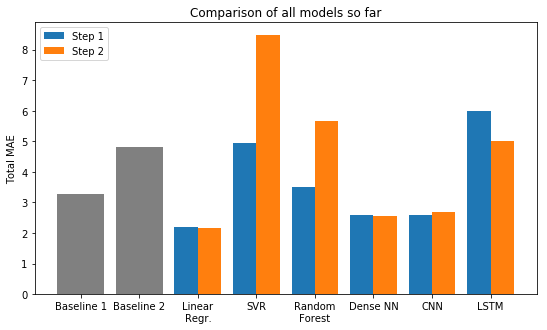

In [54]:
plt.figure(figsize=(9,5))
plt.bar(np.arange(2), [total_mae_baseline1, total_mae_baseline2], width=0.8, color='grey')
plt.bar(np.arange(2,8)-0.2, [total_mae_lr1, total_mae_svr1, total_mae_rf1,
                      total_mae_nn1, total_mae_cnn1, total_mae_lstm1], width=0.4, label='Step 1')
plt.bar(np.arange(2,8)+0.2, [total_mae_lr2, total_mae_svr2, total_mae_rf2,
                      total_mae_nn2, total_mae_cnn2, total_mae_lstm2], width=0.4, label='Step 2')
plt.xticks(ticks=np.arange(8),
           labels=['Baseline 1', 'Baseline 2', 'Linear\nRegr.', 'SVR', 'Random\nForest', 'Dense NN', 'CNN', 'LSTM'])
plt.ylabel('Total MAE')
plt.legend(loc='upper left')
plt.title("Comparison of all models so far")
plt.show()

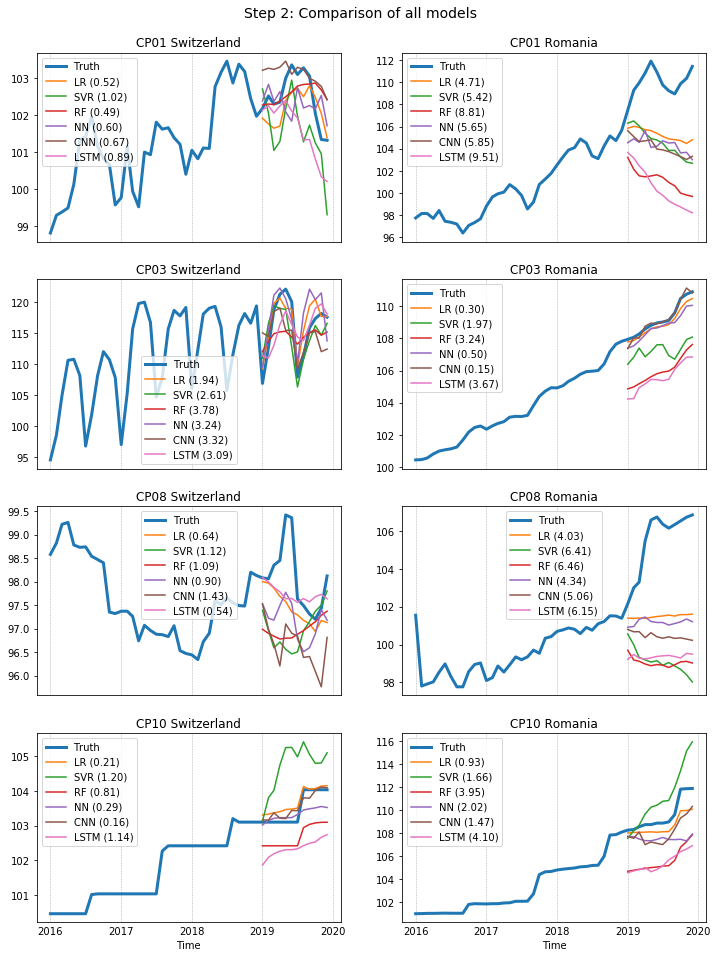

In [55]:
fig, axes = plt.subplots(4, 2, figsize=(12, 16), sharex=True)
plt.suptitle("Step 2: Comparison of all models", fontsize=14, y=0.92)
for i, ax in zip([0,2,5,7,10,12,15,17], axes.ravel()):
    ax.plot(df_task2.iloc[-48:,i], lw=3, label='Truth')
    ax.plot(df_task2.index[-12:], Y_lr2_pred[i,0], label='LR ({:.2f})'.format(mae_lr2[i]))
    ax.plot(df_task2.index[-12:], Y_svr2_pred[i,0], label='SVR ({:.2f})'.format(mae_svr2[i]))
    ax.plot(df_task2.index[-12:], Y_rf2_pred[i,0], label='RF ({:.2f})'.format(mae_rf2[i]))
    ax.plot(df_task2.index[-12:], Y_nn2_pred[i,0], label='NN ({:.2f})'.format(mae_nn2[i]))
    ax.plot(df_task2.index[-12:], Y_cnn2_pred[i,0], label='CNN ({:.2f})'.format(mae_cnn2[i]))
    ax.plot(df_task2.index[-12:], Y_lstm2_pred[i,0], label='LSTM ({:.2f})'.format(mae_lstm2[i]))
    
    ax.set_title(df_task2.columns[i])
    ax.set_xticks(['2016','2017','2018','2019','2020'])
    ax.grid(axis='x', linestyle='--', linewidth=0.5)
    ax.tick_params(axis='x', which='both', length=0)
    ax.legend()
    if i in [15,17]:
        ax.set_xlabel('Time')
plt.show()

### Conclusion of Step 2
Overall, the results were similar or even worse than in step 1. Again the Linear Regression model yielded the best accuracy but the Support Vector Regression and the Random Forest model were significantly worse than before. I spent a lot of time on the deep learning models but did not reach the same accuracy as with Linear Regression. In addition they also show quite a strong non-reproducibility.

The good news is that now the Linear Regression model is also able to capture the step in the 'CP10' indices.

## Step 3: Predict the time series out of the monthly rates of change
As the recursive approach from step 1 was performing a bit better I will reuse it here. That means that I will use the same workflow to predict the rate of change of the next month out of the rates of change of the previous 12 months. Knowing the previous indices and having a prediction for the rates of change we can then compute a prediction for the indices.

### Data Preparation
We still need to prepare the data of the monthly rates of change in a similar manner as the indices. First we will reshape the dataframe of the monthly rates of change so that it looks like the `df_task2` dataframe. Then we can reuse the code from above to extract the feature matrix `X` and the corresponding targets `ydot` - these are the monthly rates of change. In addition we will also need the index values `y` as they will be needed to evaluate the MAE.

In [56]:
# read in data saved during EDA
df_mmor = pd.read_csv(os.path.join('Data Project','df_mmor_small.csv'), index_col=0)

# extract relevant data
df_mmor = df_mmor[df_mmor['COICOP'].isin(['CP01','CP03','CP08','CP10'])]      # indices
df_mmor = df_mmor[df_mmor['Country'].isin(['Switzerland','Germany','Romania','Turkey','United Kingdom'])]      # countries
df_mmor = pd.concat([df_mmor[['COICOP','Country']], df_mmor.loc[:,'2019M12':'2005M01']], sort=False, axis=1)   # years
df_mmor.head()

,COICOP,Country,2019M12,2019M11,2019M10,2019M09,2019M08,2019M07,2019M06,2019M05,...,2005M10,2005M09,2005M08,2005M07,2005M06,2005M05,2005M04,2005M03,2005M02,2005M01
7555,CP01,Switzerland,-0.019736,-0.695737,-0.980012,-0.213013,0.174588,-0.251548,0.349515,0.635076,...,-0.500501,-0.100000,-0.299103,-0.987167,0.197824,-0.295858,-0.098522,-0.098425,0.594059,0.198413
7558,CP01,Germany,0.463392,0.465549,-0.371058,-0.092678,0.092764,0.372439,0.093197,0.374181,...,-0.374532,-0.124688,-0.742574,-0.858896,0.122850,0.493827,-0.123305,0.371287,0.622665,0.375000
7586,CP01,Romania,0.978793,0.436920,0.844502,-0.265495,-0.473804,-1.045893,-0.884718,0.965443,...,1.240496,0.146941,-0.040059,0.200696,0.403009,0.107585,0.026903,0.269760,0.474319,0.394558
7591,CP01,Turkey,2.922781,0.223012,1.648082,-0.596833,-0.773507,-1.105600,-1.645800,-1.179136,...,2.005806,1.609010,-0.745275,-1.906005,-2.445237,0.847675,-1.368128,0.330452,1.627486,0.025840
7592,CP01,United Kingdom,0.578592,0.875486,-0.676329,-0.192864,0.581959,0.000000,0.194363,0.097276,...,-0.280505,0.140449,0.140647,-1.112656,0.000000,0.700280,-0.970874,0.839161,0.704225,0.282486


In [57]:
# check if data is complete
df_mmor.isna().sum().sum()

0

In [58]:
# Rearrange data (same as df_task2)
df_mmor = df_mmor.iloc[:,:1:-1].T.set_axis(df_mmor['COICOP'] +' '+ df_mmor['Country'], axis=1, inplace=False)
df_mmor.index = pd.to_datetime(df_mmor.index, format ='%YM%m')
df_mmor.head(10)

,CP01 Switzerland,CP01 Germany,CP01 Romania,CP01 Turkey,CP01 United Kingdom,CP03 Switzerland,CP03 Germany,CP03 Romania,CP03 Turkey,CP03 United Kingdom,CP08 Switzerland,CP08 Germany,CP08 Romania,CP08 Turkey,CP08 United Kingdom,CP10 Switzerland,CP10 Germany,CP10 Romania,CP10 Turkey,CP10 United Kingdom
2005-01-01,0.198413,0.375000,0.394558,0.025840,0.282486,-12.486993,-1.931330,0.270828,-4.026642,-3.642122,0.000000,0.502513,-1.059239,-0.122294,-0.113895,0.000000,0.246002,0.119842,-0.276954,0.000000
2005-02-01,0.594059,0.622665,0.474319,1.627486,0.704225,0.000000,-0.437637,0.257235,-7.570978,-0.082169,0.000000,0.000000,6.291303,0.195910,0.228050,0.000000,0.245399,-0.444596,-0.436421,0.000000
2005-03-01,-0.098425,0.371287,0.269760,0.330452,0.839161,0.000000,1.538462,0.372033,-3.242321,0.740132,-0.145033,0.000000,-1.529470,0.293291,-0.113766,0.000000,0.244798,-1.408451,-0.119546,0.000000
2005-04-01,-0.098522,-0.123305,0.026903,-1.368128,-0.970874,16.765755,-0.108225,0.319530,5.396825,-0.408163,0.000000,0.000000,0.088395,-0.243694,0.113895,0.000000,0.122100,-0.418118,-0.079793,0.000000
2005-05-01,-0.295858,0.493827,0.107585,0.847675,0.700280,0.000000,-0.325027,0.242069,9.672021,0.081967,0.000000,-0.500000,0.227101,0.903872,-0.455063,0.000000,0.000000,0.034990,0.359353,0.000000
2005-06-01,0.197824,0.122850,0.403009,-2.445237,0.000000,0.000000,-0.869565,0.254194,0.472994,-0.327600,-8.569354,-0.083752,0.239174,-0.689989,0.228571,0.000000,0.000000,0.174886,3.262383,0.000000
2005-07-01,-0.987167,-0.858896,0.200696,-1.906005,-1.112656,-17.617108,-1.644737,0.139452,-7.258922,-4.108463,-2.144559,0.000000,-1.004646,-0.195027,-0.798176,0.000000,0.121951,-0.104749,0.905413,0.000000
2005-08-01,-0.299103,-0.742574,-0.040059,-0.745275,0.140647,0.000000,-0.445931,0.164578,-4.421156,1.713796,0.000000,-0.167645,-2.384879,0.329751,0.459770,0.000000,0.000000,-0.349528,0.706376,0.000000
2005-09-01,-0.100000,-0.124688,0.146941,1.609010,0.140449,0.000000,2.687570,0.252781,2.072983,1.684920,-0.730519,-0.503778,0.077973,0.632988,-0.114416,1.518692,0.365408,1.052262,2.483412,2.005013
2005-10-01,-0.500501,-0.374532,1.240496,2.005806,-0.280505,20.766378,0.654308,0.642965,8.157100,0.082850,0.000000,-0.590717,2.869757,1.221725,-0.229095,0.000000,0.242718,8.417216,0.092490,2.702703


In [59]:
# Create lag feature matrix (same as df_task2)
X=[]
for col in df_mmor.columns:
    # build feature matrix for time series in column 'col'
    X_col = df_mmor[col].shift(periods=12).values
    for lag in np.arange(11,0,-1):
        X_col = np.c_[X_col, df_mmor[col].shift(periods=lag).values]
    
    X.append(X_col[12:])         # the first 12 rows of 'X_col' contain NaN and need to be dropped
    
X=np.array(X)                    # convert list to numpy array

# Extract targets for ML setup
ydot = df_mmor.iloc[12:].T.values

# Extract corresponding indices for validation and testing
y = df_task2.iloc[12:].T.values
        
print('Shape X: ', np.shape(X))
print('Shape ydot: ', np.shape(ydot))
print('Shape y: ', np.shape(y))

Shape X:  (20, 168, 12)
Shape ydot:  (20, 168)
Shape y:  (20, 168)


In [60]:
X_train = X[:,:-12]         # belonging to years 2005-2018
X_test = X[:,[-12]]         # belonging to only january 2019

ydot_train = ydot[:,:-12]   # years 2005-2018

y_train = y[:,:-12]         # years 2005-2018
y_test = y[:,-12:]          # full year 2019

display(np.shape(X_train))
display(np.shape(X_test))
display(np.shape(ydot_train))
display(np.shape(y_train))
display(np.shape(y_test))

(20, 156, 12)

(20, 1, 12)

(20, 156)

(20, 156)

(20, 12)

### Linear Regression
Let's start again with the Linear Regression model. We can copy-paste the setup from step 1 but need to adapt the loop for the prediction:
1. predict the next rate of change
2. compute the next month out of the predicted rate of change and the previous month
3. update feature matrix

In [61]:
lr3 = LinearRegression()

# initialize y_pred
y_lr3_pred = np.empty((20,12))

# outer loop over all indices
for i in np.arange(df_mmor.shape[1]):    
    
    # fit LR model for index i
    lr3.fit(X_train[i], ydot_train[i])
    
    # create a local copy
    X_pred = X_test[i].copy()
    
    # inner loop over all months
    for month in np.arange(12):
        
        # predict next rate of change
        ydot_pred = lr3.predict(X_pred)
        
        # predict month
        if month==0:
            y_lr3_pred[i,month] = (ydot_pred/100 + 1) * y_train[i,-1]
        else:
            y_lr3_pred[i,month] = (ydot_pred/100 + 1) * y_lr3_pred[i,month-1]
        
        # shift data by 1 to the left, append ydot_pred, reshape to (1,12)
        X_pred = np.append(X_pred[:,1:], ydot_pred).reshape(1,12)  
        
# Compute MAE LR3 for 2019
mae_lr3 = [MAE(y_lr3_pred[i], y_test[i]) for i in np.arange(df_mmor.shape[1])]
total_mae_lr3 = np.mean(mae_lr3)

print('MAE Linear Regression:')
for i in np.arange(len(mae_lr3)):
    print(df_mmor.columns[i],'{:.2f}'.format(mae_lr3[i]))
print('\nTotal MAE Linear Regression: {:.2f}'.format(total_mae_lr3))

MAE Linear Regression:
CP01 Switzerland 0.55
CP01 Germany 0.25
CP01 Romania 2.58
CP01 Turkey 9.04
CP01 United Kingdom 0.51
CP03 Switzerland 2.84
CP03 Germany 1.31
CP03 Romania 0.22
CP03 Turkey 9.17
CP03 United Kingdom 0.90
CP08 Switzerland 0.52
CP08 Germany 0.19
CP08 Romania 2.92
CP08 Turkey 1.11
CP08 United Kingdom 0.78
CP10 Switzerland 0.24
CP10 Germany 1.46
CP10 Romania 0.31
CP10 Turkey 5.65
CP10 United Kingdom 2.50

Total MAE Linear Regression: 2.15


### Support Vector Regression with RBF Kernel
We can again copy-paste the basic setup from step 1. But as the characteristics of the data are very different we need to rerun the grid search.

In [62]:
# split training set into pretrain and validation set
X_pretrain = X_train[:,:-12]     # years 2005-2017
X_val = X_train[:,[-12]]         # only january 2018

ydot_pretrain = ydot_train[:,:-12]     # years 2005-2017
ydot_val = ydot_train[:,-12:]          # full year 2018

y_pretrain = y_train[:,:-12]     # years 2005-2017
y_val = y_train[:,-12:]          # full year 2018

display(np.shape(X_pretrain))
display(np.shape(X_val))
display(np.shape(ydot_pretrain))
display(np.shape(ydot_val))
display(np.shape(y_pretrain))
display(np.shape(y_val))

(20, 144, 12)

(20, 1, 12)

(20, 144)

(20, 12)

(20, 144)

(20, 12)

In [63]:
# Grid search on pretrain and validation set
svr3 = SVR(kernel='rbf', gamma='scale')

grid = ParameterGrid({
    'C': np.logspace(-5, 5, num=11),
    'epsilon': np.logspace(-7, 3, num=11)
})

results = []

# loop over all parameters
for params_dict in grid:
    # Set parameters
    svr3.set_params(**params_dict)

    # initialize y_pred
    y_svr3_pred = np.empty((20,12))

    # outer loop over all indices
    for i in np.arange(df_mmor.shape[1]):    

        # fit SVR model for index i
        svr3.fit(X_pretrain[i], ydot_pretrain[i])

        # create a local copy
        X_pred = X_val[i].copy()

        # inner loop over all months
        for month in np.arange(12):

            # predict next rate of change
            ydot_pred = svr3.predict(X_pred) 
            
            # predict month
            if month==0:
                y_svr3_pred[i,month] = (ydot_pred/100 + 1) * y_pretrain[i,-1]
            else:
                y_svr3_pred[i,month] = (ydot_pred/100 + 1) * y_svr3_pred[i,month-1]

            # shift data by 1 to the left, append ydot_pred, reshape to (1,12)
            X_pred = np.append(X_pred[:,1:], ydot_pred).reshape(1,12)  

    # Compute MAE SVR3 for 2018
    mae_svr3 = [MAE(y_svr3_pred[i], y_val[i]) for i in np.arange(df_mmor.shape[1])]
    params_dict['Total MAE'] = np.mean(mae_svr3)

    # Save result
    results.append(params_dict)

df_results= pd.DataFrame(results)

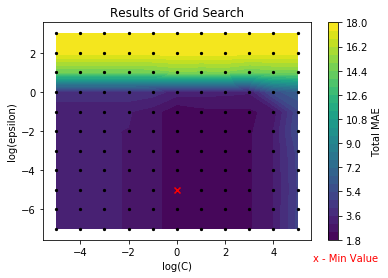

In [64]:
plt.contourf(np.log10(df_results['C'].values.reshape(11,11)), 
             np.log10(df_results['epsilon'].values.reshape(11,11)), 
             df_results['Total MAE'].values.reshape(11,11), 30)
cbar = plt.colorbar()
cbar.set_label('Total MAE')
plt.xlabel('log(C)')
plt.ylabel('log(epsilon)')
plt.title('Results of Grid Search')
plt.scatter(np.log10(df_results['C']), np.log10(df_results['epsilon']), c='k', s=5)
plt.scatter(np.log10(df_results['C'].iloc[df_results['Total MAE'].idxmin()]), 
            np.log10(df_results['epsilon'].iloc[df_results['Total MAE'].idxmin()]), 
            marker='x', c='r')
plt.figtext(0.9, 0.05, "x - Min Value",  color='r', ha ='right')
plt.show()

The output of the grid search looks clearly different from before and the minimum is now found to be at $C=1$ and $\varepsilon=10^{-5}$.

In [65]:
# use optimized parameters on full training and test set
svr3 = SVR(kernel='rbf', gamma='scale', C=1, epsilon=1e-5)

# initialize y_pred
y_svr3_pred = np.empty((20,12))

# outer loop over all indices
for i in np.arange(df_mmor.shape[1]):    
    
    # fit SVR model for index i
    svr3.fit(X_train[i], ydot_train[i])
    
    # create a local copy
    X_pred = X_test[i].copy()
    
    # inner loop over all months
    for month in np.arange(12):
        
        # predict next rate of change
        ydot_pred = svr3.predict(X_pred) 
        
        # predict month
        if month==0:
            y_svr3_pred[i,month] = (ydot_pred/100 + 1) * y_train[i,-1]
        else:
            y_svr3_pred[i,month] = (ydot_pred/100 + 1) * y_svr3_pred[i,month-1]
        
        # shift data by 1 to the left, append ydot_pred, reshape to (1,12)
        X_pred = np.append(X_pred[:,1:], ydot_pred).reshape(1,12)  
        
# Compute MAE SVR3 for 2019
mae_svr3 = [MAE(y_svr3_pred[i], y_test[i]) for i in np.arange(df_mmor.shape[1])]
total_mae_svr3 = np.mean(mae_svr3)

print('MAE Support Vector Regression:')
for i in np.arange(len(mae_svr3)):
    print(df_mmor.columns[i],'{:.2f}'.format(mae_svr3[i]))
print('\nTotal MAE Support Vector Regression: {:.2f}'.format(total_mae_svr3))

MAE Support Vector Regression:
CP01 Switzerland 0.63
CP01 Germany 0.48
CP01 Romania 1.99
CP01 Turkey 7.03
CP01 United Kingdom 0.83
CP03 Switzerland 1.97
CP03 Germany 1.35
CP03 Romania 0.27
CP03 Turkey 8.58
CP03 United Kingdom 0.75
CP08 Switzerland 0.51
CP08 Germany 0.26
CP08 Romania 3.29
CP08 Turkey 0.69
CP08 United Kingdom 0.76
CP10 Switzerland 0.08
CP10 Germany 1.23
CP10 Romania 0.39
CP10 Turkey 6.88
CP10 United Kingdom 0.15

Total MAE Support Vector Regression: 1.91


Hey, that's much better than before!

### Random Forest Regressor
As already explained the Random Forest Regressor is not able to extrapolate values out of the training range. That had been a severe limitation when working with non-stationary data in step 1 and 2. Now in step 3 we use stationary data. Consequently without this systematic limitation I expect the model to perform significantly better. Let's start with a parameter optimization:

In [66]:
# Grid search on pretrain and validation set
rf3 = RandomForestRegressor(random_state=0)

grid = ParameterGrid({
    'criterion': ['mae','mse'],
    'bootstrap': [True,False],
    'n_estimators': [10,50,100,200,300,500]
})

results = []

# loop over all parameters
for params_dict in grid:
    start = time.time()
    
    # Set parameters
    rf3.set_params(**params_dict)

    # initialize y_pred
    y_rf3_pred = np.empty((20,12))

    # outer loop over all indices
    for i in np.arange(df_mmor.shape[1]):    

        # fit RF model for index i
        rf3.fit(X_pretrain[i], ydot_pretrain[i])

        # create a local copy
        X_pred = X_val[i].copy()

        # inner loop over all months
        for month in np.arange(12):

            # predict next rate of change
            ydot_pred = rf3.predict(X_pred) 
            
            # predict month
            if month==0:
                y_rf3_pred[i,month] = (ydot_pred/100 + 1) * y_pretrain[i,-1]
            else:
                y_rf3_pred[i,month] = (ydot_pred/100 + 1) * y_rf3_pred[i,month-1]

            # shift data by 1 to the left, append ydot_pred, reshape to (1,12)
            X_pred = np.append(X_pred[:,1:], ydot_pred).reshape(1,12)  
            
    end = time.time()

    # Compute MAE RF3 for 2018
    mae_rf3 = [MAE(y_rf3_pred[i], y_val[i]) for i in np.arange(df_mmor.shape[1])]
    params_dict['Total MAE'] = np.mean(mae_rf3)
    params_dict['Time'] = end - start

    # Save result
    results.append(params_dict)

df_results = pd.DataFrame(results)

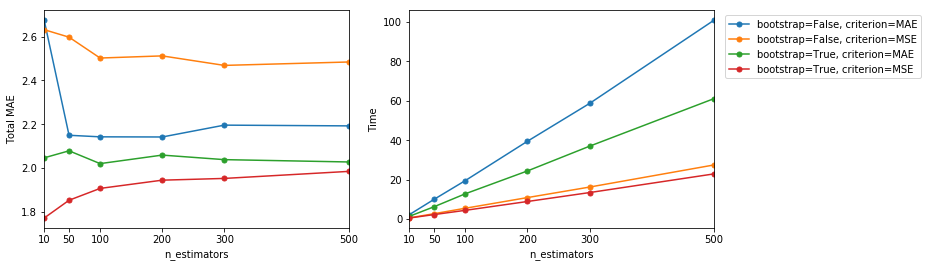

In [67]:
df_results['Parameters'] = \
    'bootstrap=' + df_results['bootstrap'].map(str) + ', criterion=' + df_results['criterion'].map(str.upper)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
df_results.pivot(index='n_estimators', columns='Parameters', values='Total MAE').plot(
    ax=axes[0], marker='.', markersize=10, xticks=[10,50,100,200,300,500], legend=False)
axes[0].set_ylabel('Total MAE')

df_results.pivot(index='n_estimators', columns='Parameters', values='Time').plot(
    ax=axes[1], marker='.', markersize=10, xticks=[10,50,100,200,300,500])
axes[1].set_ylabel('Time')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.show()

From the output we see that the default parameters (bootstrap=True and criterion=MSE) yield the lowest Total MAE and need the lowest computational effort. The computational effort depends linearly from the number of estimators. I would expect the accuracy to grow with the number of estimators until it reaches a lower bound. The red line shows exactly the opposite - good luck? So I will stick to the default of 100 estimators:

In [68]:
rf3 = RandomForestRegressor(n_estimators=100, random_state=0)

# initialize y_pred
y_rf3_pred = np.empty((20,12))

# outer loop over all indices
for i in np.arange(df_mmor.shape[1]):    
    
    # fit RF model for index i
    rf3.fit(X_train[i], ydot_train[i])
    
    # create a local copy
    X_pred = X_test[i].copy()
    
    # inner loop over all months
    for month in np.arange(12):
        
        # predict next rate of change
        ydot_pred = rf3.predict(X_pred) 
        
        # predict month
        if month==0:
            y_rf3_pred[i,month] = (ydot_pred/100 + 1) * y_train[i,-1]
        else:
            y_rf3_pred[i,month] = (ydot_pred/100 + 1) * y_rf3_pred[i,month-1]
        
        # shift data by 1 to the left, append ydot_pred, reshape to (1,12)
        X_pred = np.append(X_pred[:,1:], ydot_pred).reshape(1,12)  
        
# Compute MAE RF3 for 2019
mae_rf3 = [MAE(y_rf3_pred[i], y_test[i]) for i in np.arange(df_mmor.shape[1])]
total_mae_rf3 = np.mean(mae_rf3)

print('MAE Random Forest Regressor:')
for i in np.arange(len(mae_rf3)):
    print(df_mmor.columns[i],'{:.2f}'.format(mae_rf3[i]))
print('\nTotal MAE Random Forest Regressor: {:.2f}'.format(total_mae_rf3))

MAE Random Forest Regressor:
CP01 Switzerland 0.70
CP01 Germany 0.97
CP01 Romania 1.62
CP01 Turkey 6.03
CP01 United Kingdom 1.05
CP03 Switzerland 2.24
CP03 Germany 1.49
CP03 Romania 0.26
CP03 Turkey 13.63
CP03 United Kingdom 0.70
CP08 Switzerland 1.03
CP08 Germany 0.13
CP08 Romania 3.47
CP08 Turkey 2.66
CP08 United Kingdom 1.65
CP10 Switzerland 0.17
CP10 Germany 1.46
CP10 Romania 0.34
CP10 Turkey 5.25
CP10 United Kingdom 0.39

Total MAE Random Forest Regressor: 2.26


As expected this is much better than before!

### Dense Neural Network with One Hidden Layer
In step 1 and 2, for the neural networks I had scaled the time series of the indices to improve the convergence of the solver. That was due to numerical reasons, it is not mandatory from a systematic point of view. Now the rates of change are already centered around a constant value close to zero. Thus it is not necessary to scale them. I tried with and without, it did not improve the performance. But as the characteristics of the data is different I will rerun the parameter variation for the number of units in the hidden layer:

In [69]:
# # Make folder
# try:       
#     os.makedirs(os.path.join('Data Project', 'DenseNN3')) 
# except FileExistsError:
#     pass

# # Set index to investigate
# for i in np.arange(df_mmor.shape[1]):
    
#     count = 0       # loop counter

#     fig, axes = plt.subplots(2, 3, figsize=(12, 6), sharex=True, sharey=True)
#     fig.text(0.5, 0.04, 'Epoch', ha='center')
#     fig.text(0.08, 0.5, 'Scaled Loss Value', va='center', rotation='vertical')

#     print('\nIndex '+ str(i) +':', end=' ')
#     for nr_units,ax in zip([2,3,4,6,8,12], axes.ravel()):
#         nn3 = Sequential()
#         nn3.add(Dense(nr_units, activation='relu', input_dim=12))
#         nn3.add(Dense(1))

#         # Define loss function and optimizer to track during training
#         nn3.compile(loss='mean_absolute_error', 
#                    optimizer=optimizers.Adam(lr=0.001)  # adjust learning rate if needed                   
#         )

#         # fit NN model for index i
#         start = time.time()
#         history = nn3.fit(
#             x=X_pretrain[i], y=ydot_pretrain[i],               # pretrain set 
#             validation_data=(X_train[i,-12:], ydot_val[i]),    # full year 2018
#             batch_size=12,
#             epochs=50,
#             shuffle=True,
#             #callbacks=[early_stopping],
#             verbose=0
#         )
#         end = time.time()
#         print(count, end='/')
#         count += 1
#         K.clear_session()            # very important: avoid memory blow-up

#         # Plot convergence of loss values 
#         ax.plot(history.history['loss'], label='train loss')
#         ax.plot(history.history['val_loss'], label='val loss')
#         ax.set_ylim((0,4))
#         ax.set_title('Units: {} | Elapsed Time: {:.1f}'.format(nr_units, end-start), fontsize=10)
#         ax.legend()
#     plt.savefig(os.path.join('Data Project','DenseNN3','Index_' +str(i)))
#     plt.close(fig)

In [70]:
# use 8 units
nn3 = Sequential()
nn3.add(Dense(8, activation='relu', input_dim=12))
nn3.add(Dense(1))
nn3.compile(loss='mean_absolute_error', optimizer='adam')

# initialize y_pred
y_nn3_pred = np.empty((20,12))

# outer loop over all indices
for i in np.arange(df_mmor.shape[1]):
    
    # fit NN model for index i
    nn3.fit(
        x=X_train[i], y=ydot_train[i],
        batch_size=12,
        epochs=50,
        shuffle=True,
        verbose=0       # suppress output
    )
    
    # create a local copy
    X_pred = X_test[i].copy()
    
    # inner loop over all months
    for month in np.arange(12):
        
        # predict next rate of change
        ydot_pred = nn3.predict(X_pred)
        
        # predict month
        if month==0:
            y_nn3_pred[i,month] = (ydot_pred/100 + 1) * y_train[i,-1]
        else:
            y_nn3_pred[i,month] = (ydot_pred/100 + 1) * y_nn3_pred[i,month-1] 
        
        # shift data by 1 to the left, append ydot_pred, reshape to (1,12)
        X_pred = np.append(X_pred[:,1:], ydot_pred).reshape(1,12)  
        
K.clear_session()
        
# Compute MAE NN3 for 2019
mae_nn3 = [MAE(y_nn3_pred[i], y_test[i]) for i in np.arange(df_mmor.shape[1])]
total_mae_nn3 = np.mean(mae_nn3)

print('MAE Dense Neural Network:')
for i in np.arange(len(mae_nn3)):
    print(df_mmor.columns[i],'{:.2f}'.format(mae_nn3[i]))
print('\nTotal MAE Dense Neural Network: {:.2f}'.format(total_mae_nn3))

MAE Dense Neural Network:
CP01 Switzerland 0.84
CP01 Germany 0.41
CP01 Romania 1.07
CP01 Turkey 8.03
CP01 United Kingdom 0.63
CP03 Switzerland 4.13
CP03 Germany 1.21
CP03 Romania 0.31
CP03 Turkey 8.14
CP03 United Kingdom 0.80
CP08 Switzerland 0.57
CP08 Germany 0.20
CP08 Romania 3.99
CP08 Turkey 0.78
CP08 United Kingdom 1.70
CP10 Switzerland 0.28
CP10 Germany 1.06
CP10 Romania 0.71
CP10 Turkey 5.48
CP10 United Kingdom 0.13

Total MAE Dense Neural Network: 2.02


### Convolutional Neural Network (CNN)
For the CNN I will also rerun the grid search:

In [71]:
# new shape
X_pretrain = X_pretrain.reshape((X_pretrain.shape[0], X_pretrain.shape[1], X_pretrain.shape[2], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], X_val.shape[2], 1))
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))
display(X_pretrain.shape)
display(X_val.shape)
display(X_train.shape)
display(X_test.shape)

(20, 144, 12, 1)

(20, 1, 12, 1)

(20, 156, 12, 1)

(20, 1, 12, 1)

In [72]:
# HUGE PARAMETER VARIATION
# OUTPUT SAVED TO 'Data Project\CNN3'
# UNCOMMENT WITH Ctrl+/ IF YOU WANT TO RUN IT


# parameter study of number of filters and kernel size

# # Make folder
# try:       
#     os.makedirs(os.path.join('Data Project', 'CNN3')) 
# except FileExistsError:
#     pass

# for nr_units in [8,16,32]:
#     print('\nNumber of units: ' + str(nr_units), end='')

#     # Set index to investigate
#     for i in np.arange(df_mmor.shape[1]):

#         fig, axes = plt.subplots(3, 4, figsize=(12, 7), sharex=True, sharey=True)
#         fig.text(0.5, 0.06, 'Epoch', ha='center')
#         fig.text(0.2, 0.03, '8 filters', ha='center')
#         fig.text(0.4, 0.03, '16 filters', ha='center')
#         fig.text(0.6, 0.03, '32 filters', ha='center')
#         fig.text(0.8, 0.03, '64 filters', ha='center')
#         fig.text(0.08, 0.5, 'Loss Value', va='center', rotation='vertical')
#         fig.text(0.05, 0.25, 'kernel size 5', va='center', rotation='vertical')
#         fig.text(0.05, 0.5, 'kernel size 3', va='center', rotation='vertical')
#         fig.text(0.05, 0.75, 'kernel size 2', va='center', rotation='vertical')


#         print('\nIndex '+ str(i) +':', end=' ')
#         for m, kernelsize in enumerate([2,3,5]):
#             for n, nr_filters in enumerate([8,16,32,64]):
#                 cnn3 = Sequential()
#                 cnn3.add(Conv1D(filters=nr_filters, kernel_size=kernelsize, activation='relu', input_shape=(12, 1)))
#                 cnn3.add(MaxPooling1D(pool_size=2))
#                 cnn3.add(Flatten())
#                 cnn3.add(Dense(nr_units, activation='relu'))
#                 #cnn3.add(Dropout(0.25))            # optional
#                 cnn3.add(Dense(1))

#                 # Define loss function and optimizer to track during training
#                 cnn3.compile(loss='mean_absolute_error', 
#                            optimizer=optimizers.Adam(lr=0.001)  # adjust learning rate if needed                   
#                 )


#                 # fit CNN model for index i
#                 start = time.time()
#                 history = cnn3.fit(
#                     x=X_train[i,:-12], y=ydot_pretrain[i],                  # pretrain set 
#                     validation_data=(X_train[i,-12:], ydot_val[i]),         # full year 2018
#                     batch_size=12,
#                     epochs=100,
#                     shuffle=True,
#                     #callbacks=[early_stopping],
#                     verbose=0
#                 )
#                 end = time.time()
#                 print(4*m+n+1, end='/')
#                 K.clear_session()            # very important: avoid memory blow-up

#                 # Plot convergence of loss values 
#                 axes[m,n].plot(history.history['loss'], label='train loss')
#                 axes[m,n].plot(history.history['val_loss'], label='val loss')
#                 axes[m,n].set_ylim((0,4))
#                 axes[m,n].set_title('Elapsed Time: {:.1f}'.format(end-start), fontsize=10)
#                 axes[m,n].legend()
#         plt.savefig(os.path.join('Data Project','CNN3','Units_'+str(nr_units)+'_Index_'+str(i)))
#         plt.close(fig)

In [73]:
# use 32 units, 32 filters, kernel size = 5 
cnn3 = Sequential()
cnn3.add(Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=(12, 1)))
cnn3.add(MaxPooling1D(pool_size=2))
cnn3.add(Flatten())
cnn3.add(Dense(32, activation='relu'))
cnn3.add(Dense(1))
cnn3.compile(loss='mae', optimizer=optimizers.Adam(lr=0.001))

# initialize y_pred
y_cnn3_pred = np.empty((20,12))

# outer loop over all indices
for i in np.arange(df_mmor.shape[1]):
    
    # fit CNN model for index i
    cnn3.fit(
        x=X_train[i], y=ydot_train[i],
        batch_size=12,
        epochs=100,
        shuffle=True,
        verbose=0       # suppress output
    )
    
    # create a local copy
    X_pred = X_test[i].copy()
    
    # inner loop over all months
    for month in np.arange(12):
        
        # predict next rate of change
        ydot_pred = cnn3.predict(X_pred)
        
        # predict month
        if month==0:
            y_cnn3_pred[i,month] = (ydot_pred/100 + 1) * y_train[i,-1]
        else:
            y_cnn3_pred[i,month] = (ydot_pred/100 + 1) * y_cnn3_pred[i,month-1] 
        
        # shift data by 1 to the left, append ydot_pred, reshape to (1,12,1)
        X_pred = np.append(X_pred[:,1:], ydot_pred).reshape(1,12,1)  
        
K.clear_session()
        
# Compute MAE CNN3 for 2019
mae_cnn3 = [MAE(y_cnn3_pred[i], y_test[i]) for i in np.arange(df_mmor.shape[1])]
total_mae_cnn3 = np.mean(mae_cnn3)

print('MAE Convolutional Neural Network:')
for i in np.arange(len(mae_cnn3)):
    print(df_mmor.columns[i],'{:.2f}'.format(mae_cnn3[i]))
print('\nTotal MAE Convolutional Neural Network: {:.2f}'.format(total_mae_cnn3))

MAE Convolutional Neural Network:
CP01 Switzerland 0.87
CP01 Germany 0.69
CP01 Romania 2.68
CP01 Turkey 11.50
CP01 United Kingdom 0.85
CP03 Switzerland 1.86
CP03 Germany 1.67
CP03 Romania 0.16
CP03 Turkey 13.31
CP03 United Kingdom 0.73
CP08 Switzerland 0.62
CP08 Germany 0.15
CP08 Romania 3.55
CP08 Turkey 2.28
CP08 United Kingdom 1.28
CP10 Switzerland 0.43
CP10 Germany 0.35
CP10 Romania 0.29
CP10 Turkey 6.50
CP10 United Kingdom 0.25

Total MAE Convolutional Neural Network: 2.50


### Recurrent Neural Network (LSTM)

In [74]:
# HUGE PARAMETER VARIATION
# OUTPUT SAVED TO 'Data Project\LSTM3'
# UNCOMMENT WITH Ctrl+/ IF YOU WANT TO RUN IT


# # parameter study of number of units

# # Make folder
# try:       
#     os.makedirs(os.path.join('Data Project', 'LSTM3')) 
# except FileExistsError:
#     pass

# # Set index to investigate
# for i in np.arange(df_mmor.shape[1]):

#     fig, axes = plt.subplots(3, 4, figsize=(12, 7), sharex=True, sharey=True)
#     fig.text(0.5, 0.06, 'Epoch', ha='center')
#     fig.text(0.08, 0.5, 'Loss Value', va='center', rotation='vertical')


#     print('\nIndex '+ str(i) +':', end=' ')
#     for nr_units, ax in zip(np.arange(1,13), axes.ravel()):
#         lstm3 = Sequential()
#         lstm3.add(LSTM(nr_units, activation='relu', input_shape=(12,1)))
#         #lstm3.add(Dropout(1/6.0))     # optional
#         lstm3.add(Dense(1))

#         # Define loss function and optimizer to track during training
#         lstm3.compile(loss='mean_absolute_error', 
#                    optimizer=optimizers.Adam(lr=0.001)  # adjust learning rate if needed                   
#         )


#         # fit LSTM model for index i
#         start = time.time()
#         history = lstm3.fit(
#             x=X_train[i,:-12], y=ydot_pretrain[i],               # pretrain set 
#             validation_data=(X_train[i,-12:], ydot_val[i]),    # full year 2018
#             batch_size=12,
#             epochs=300,
#             shuffle=True,
#             #callbacks=[early_stopping],
#             verbose=0
#         )
#         end = time.time()
#         print(nr_units, end='/')
#         K.clear_session()            # very important: avoid memory blow-up

#         # Plot convergence of loss values 
#         ax.plot(history.history['loss'], label='train loss')
#         ax.plot(history.history['val_loss'], label='val loss')
#         ax.set_ylim((0,1))
#         ax.set_title('Units: {:} | Elapsed Time: {:.1f}'.format(nr_units, end-start), fontsize=10)
#         ax.legend()
#     plt.savefig(os.path.join('Data Project','LSTM3','Index_'+str(i)))
#     plt.close(fig)

In [75]:
# use 12 units
lstm3 = Sequential()
lstm3.add(LSTM(12, activation='relu', input_shape=(12,1)))
lstm3.add(Dropout(1/6.0))
lstm3.add(Dense(1))
lstm3.compile(loss='mae', optimizer=optimizers.Adam(lr=0.001))

# initialize y_pred
y_lstm3_pred = np.empty((20,12))

# outer loop over all indices
for i in np.arange(df_mmor.shape[1]):
    
    # fit LSTM model for index i
    lstm3.fit(
        x=X_train[i], y=ydot_train[i],
        batch_size=12,
        epochs=300,
        shuffle=True,
        verbose=0       # suppress output
    )
    
    # create a local copy
    X_pred = X_test[i].copy()
    
    # inner loop over all months
    for month in np.arange(12):
        
        # predict next rate of change
        ydot_pred = lstm3.predict(X_pred)
        
        # predict month
        if month==0:
            y_lstm3_pred[i,month] = (ydot_pred/100 + 1) * y_train[i,-1]
        else:
            y_lstm3_pred[i,month] = (ydot_pred/100 + 1) * y_lstm3_pred[i,month-1] 
        
        # shift data by 1 to the left, append ydot_pred, reshape to (1,12,1)
        X_pred = np.append(X_pred[:,1:], ydot_pred).reshape(1,12,1)  
        
K.clear_session()
        
# Compute MAE LSTM3 for 2019
mae_lstm3 = [MAE(y_lstm3_pred[i], y_test[i]) for i in np.arange(df_mmor.shape[1])]
total_mae_lstm3 = np.mean(mae_lstm3)

print('MAE Recurrent Neural Network:')
for i in np.arange(len(mae_lstm3)):
    print(df_mmor.columns[i],'{:.2f}'.format(mae_lstm3[i]))
print('\nTotal MAE Recurrent Neural Network: {:.2f}'.format(total_mae_lstm3))

MAE Recurrent Neural Network:
CP01 Switzerland 3.41
CP01 Germany 0.24
CP01 Romania 2.73
CP01 Turkey 7.65
CP01 United Kingdom 0.79
CP03 Switzerland 10.69
CP03 Germany 0.88
CP03 Romania 0.32
CP03 Turkey 8.71
CP03 United Kingdom 0.65
CP08 Switzerland 0.51
CP08 Germany 0.19
CP08 Romania 3.93
CP08 Turkey 0.63
CP08 United Kingdom 1.91
CP10 Switzerland 0.32
CP10 Germany 2.15
CP10 Romania 0.63
CP10 Turkey 5.68
CP10 United Kingdom 0.22

Total MAE Recurrent Neural Network: 2.61


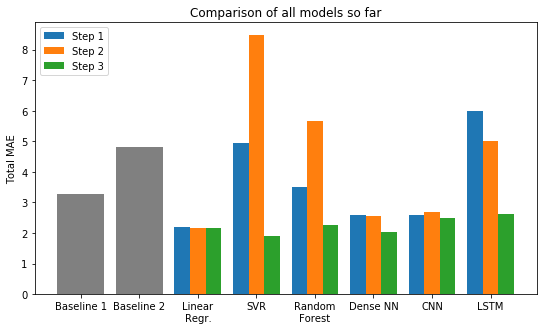

In [76]:
plt.figure(figsize=(9,5))
plt.bar(np.arange(2), [total_mae_baseline1, total_mae_baseline2], width=0.8, color='grey')
plt.bar(np.arange(2,8)-0.8/3, [total_mae_lr1, total_mae_svr1, total_mae_rf1,
                      total_mae_nn1, total_mae_cnn1, total_mae_lstm1], width=0.8/3, label='Step 1')
plt.bar(np.arange(2,8), [total_mae_lr2, total_mae_svr2, total_mae_rf2,
                      total_mae_nn2, total_mae_cnn2, total_mae_lstm2], width=0.8/3, label='Step 2')
plt.bar(np.arange(2,8)+0.8/3, [total_mae_lr3, total_mae_svr3, total_mae_rf3,
                      total_mae_nn3, total_mae_cnn3, total_mae_lstm3], width=0.8/3, label='Step 3')
plt.xticks(ticks=np.arange(8),
           labels=['Baseline 1', 'Baseline 2', 'Linear\nRegr.', 'SVR', 'Random\nForest', 'Dense NN', 'CNN', 'LSTM'])
plt.ylabel('Total MAE')
plt.legend(loc='upper left')
plt.title("Comparison of all models so far")
plt.show()

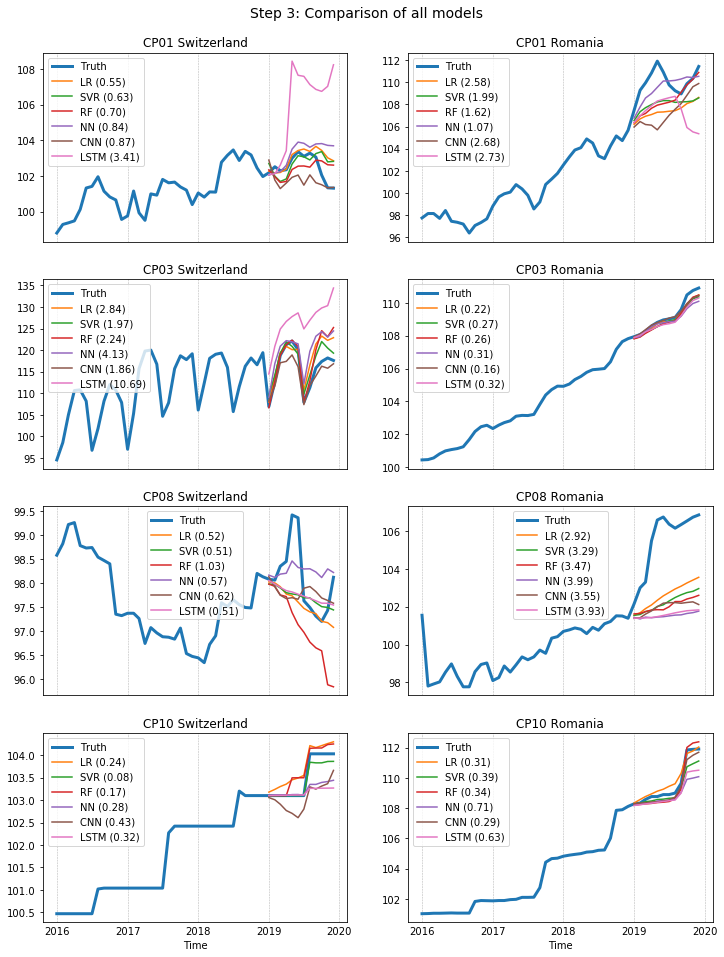

In [77]:
fig, axes = plt.subplots(4, 2, figsize=(12, 16), sharex=True)
plt.suptitle("Step 3: Comparison of all models", fontsize=14, y=0.92)
for i, ax in zip([0,2,5,7,10,12,15,17], axes.ravel()):
    ax.plot(df_task2.iloc[-48:,i], lw=3, label='Truth')
    ax.plot(df_task2.index[-12:], y_lr3_pred[i], label='LR ({:.2f})'.format(mae_lr3[i]))
    ax.plot(df_task2.index[-12:], y_svr3_pred[i], label='SVR ({:.2f})'.format(mae_svr3[i]))
    ax.plot(df_task2.index[-12:], y_rf3_pred[i], label='RF ({:.2f})'.format(mae_rf3[i]))
    ax.plot(df_task2.index[-12:], y_nn3_pred[i], label='NN ({:.2f})'.format(mae_nn3[i]))
    ax.plot(df_task2.index[-12:], y_cnn3_pred[i], label='CNN ({:.2f})'.format(mae_cnn3[i]))
    ax.plot(df_task2.index[-12:], y_lstm3_pred[i], label='LSTM ({:.2f})'.format(mae_lstm3[i]))
    
    ax.set_title(df_task2.columns[i])
    ax.set_xticks(['2016','2017','2018','2019','2020'])
    ax.grid(axis='x', linestyle='--', linewidth=0.5)
    ax.tick_params(axis='x', which='both', length=0)
    ax.legend()
    if i in [15,17]:
        ax.set_xlabel('Time')
plt.show()

### Conclusion of Step 3
Many ML models benefit from this setup and give results that are better than in step 1 and 2. They are able to predict the seasonality in 'CP03' and the step function in 'CP10'. However even with a lot of effort I was not able to push the total MAE significantly below 2. I think this is the remaining unpredictable error that only depends on good luck/bad luck.

## Step 4: Prediction of all time series at once
Obviously - especially for some of the models - it was better to work with the rates of change instead with the non-stationary indices. And it seemed to be better to use the recursive approach as we did in step 1 and step 3. So I will go on with that combination.

### Data Preparation
If we want to predict all time series at once instead of looping over all indices, for the first ML tasks we need to build a flattened feature matrix where all time series are aligned side-by-side.

In [78]:
# current shape
display(X.shape)
display(ydot.shape)
display(y.shape)

(20, 168, 12)

(20, 168)

(20, 168)

In [79]:
# align side-by-side
X_flatten = np.concatenate([X[:,:,j].T for j in np.arange(X.shape[2])], axis=1)
Ydot_flatten = ydot.T

display(X_flatten.shape)
display(Ydot_flatten.shape)

(168, 240)

(168, 20)

In this big feature matrix every 20th column represents the same index and its lags:

In [80]:
# find index 0
pd.DataFrame(X_flatten).iloc[:,np.arange(0,240,20)].head()

,0,20,40,60,80,100,120,140,160,180,200,220
0,0.198413,0.594059,-0.098425,-0.098522,-0.295858,0.197824,-0.987167,-0.299103,-0.100000,-0.500501,-0.100604,-0.100705
1,0.594059,-0.098425,-0.098522,-0.295858,0.197824,-0.987167,-0.299103,-0.100000,-0.500501,-0.100604,-0.100705,0.806452
2,-0.098425,-0.098522,-0.295858,0.197824,-0.987167,-0.299103,-0.100000,-0.500501,-0.100604,-0.100705,0.806452,0.600000
3,-0.098522,-0.295858,0.197824,-0.987167,-0.299103,-0.100000,-0.500501,-0.100604,-0.100705,0.806452,0.600000,-0.397614
4,-0.295858,0.197824,-0.987167,-0.299103,-0.100000,-0.500501,-0.100604,-0.100705,0.806452,0.600000,-0.397614,0.000000


In [81]:
# find index 1
pd.DataFrame(X_flatten).iloc[:,np.arange(1,240,20)].head()

,1,21,41,61,81,101,121,141,161,181,201,221
0,0.375000,0.622665,0.371287,-0.123305,0.493827,0.122850,-0.858896,-0.742574,-0.124688,-0.374532,0.250627,0.750000
1,0.622665,0.371287,-0.123305,0.493827,0.122850,-0.858896,-0.742574,-0.124688,-0.374532,0.250627,0.750000,0.992556
2,0.371287,-0.123305,0.493827,0.122850,-0.858896,-0.742574,-0.124688,-0.374532,0.250627,0.750000,0.992556,0.368550
3,-0.123305,0.493827,0.122850,-0.858896,-0.742574,-0.124688,-0.374532,0.250627,0.750000,0.992556,0.368550,-0.122399
4,0.493827,0.122850,-0.858896,-0.742574,-0.124688,-0.374532,0.250627,0.750000,0.992556,0.368550,-0.122399,0.367647


In [82]:
# split training and test data
X_flatten_train = X_flatten[:-12]         # belonging to years 2005-2018
X_flatten_test = X_flatten[[-12]]         # belonging to only january 2019

Ydot_flatten_train = Ydot_flatten[:-12]   # years 2005-2018

display(np.shape(X_flatten_train))
display(np.shape(X_flatten_test))
display(np.shape(Ydot_flatten_train))

(156, 240)

(1, 240)

(156, 20)

### Linear Regression
Let's start again with a simple Linear Regression model. The setup is straightforward: we do not need the loop over the indices any more, but we still need the recursive approach for the prediction of the next 12 months.

In [83]:
lr4 = LinearRegression()

# initialize y_pred
Y_lr4_pred = np.empty((12,20))
    
# fit LR model
lr4.fit(X_flatten_train, Ydot_flatten_train)

# create a local copy
X_pred = X_flatten_test.copy()

# loop over all months
for month in np.arange(12):

    # predict next rate of change
    Ydot_pred = lr4.predict(X_pred)

    # predict month
    if month==0:
        Y_lr4_pred[month] = (Ydot_pred/100 + 1) * y_train[:,-1]
    else:
        Y_lr4_pred[month] = (Ydot_pred/100 + 1) * Y_lr4_pred[month-1]

    # shift data by 20 to the left, append Ydot_pred, reshape to (1,240)
    X_pred = np.append(X_pred[:,20:], Ydot_pred).reshape(1,240)  
        
# Compute MAE LR4 for 2019
mae_lr4 = [MAE(Y_lr4_pred[:,i], y_test[i]) for i in np.arange(df_mmor.shape[1])]
total_mae_lr4 = np.mean(mae_lr4)

print('MAE Linear Regression:')
for i in np.arange(len(mae_lr4)):
    print(df_mmor.columns[i],'{:.2f}'.format(mae_lr4[i]))
print('\nTotal MAE Linear Regression: {:.2f}'.format(total_mae_lr4))

MAE Linear Regression:
CP01 Switzerland 1.53
CP01 Germany 3.05
CP01 Romania 13.48
CP01 Turkey 8.30
CP01 United Kingdom 4.19
CP03 Switzerland 6.05
CP03 Germany 3.00
CP03 Romania 0.35
CP03 Turkey 6.84
CP03 United Kingdom 3.52
CP08 Switzerland 1.04
CP08 Germany 0.92
CP08 Romania 11.16
CP08 Turkey 3.29
CP08 United Kingdom 1.05
CP10 Switzerland 3.19
CP10 Germany 9.46
CP10 Romania 2.20
CP10 Turkey 8.31
CP10 United Kingdom 26.84

Total MAE Linear Regression: 5.89


The accuracy on the test set is rather bad compared to the previous linear models. The shape of the big feature matrix `X_flatten_train` is (156, 240), i.e. it has more columns than rows, what inevitably leads to overfitting in a simple linear model.

This can be avoided by adding regularization. When using the Ridge regression model we first need to tune the $\alpha$ parameter on a preliminary pre-training and validation set. Then we can use the model in conjunction with the optimized parameter for the prediction of year 2019.

In [84]:
# split training set into pretrain and validation set
X_flatten_pretrain = X_flatten_train[:-12]     # years 2005-2017
X_flatten_val = X_flatten_train[[-12]]         # only january 2018

Ydot_flatten_pretrain = Ydot_flatten_train[:-12]     # years 2005-2017
Ydot_flatten_val = Ydot_flatten_train[-12:]          # full year 2018

display(np.shape(X_flatten_pretrain))
display(np.shape(X_flatten_val))
display(np.shape(Ydot_flatten_pretrain))
display(np.shape(Ydot_flatten_val))

(144, 240)

(1, 240)

(144, 20)

(12, 20)

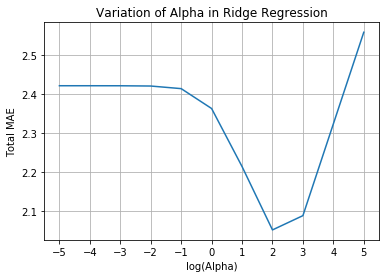

In [85]:
# Variation of alpha in Ridge regression
results = []
alpha_values = np.logspace(-5, 5, num=11)

from sklearn.linear_model import Ridge
for alpha in alpha_values:
    # Create the estimator
    ridge4 = Ridge(alpha=alpha)

    # initialize y_pred
    Y_ridge4_pred = np.empty((12,20))

    # fit Ridge model
    ridge4.fit(X_flatten_pretrain, Ydot_flatten_pretrain)

    # create a local copy
    X_pred = X_flatten_val.copy()

    # inner loop over all months
    for month in np.arange(12):

        # predict next rate of change
        Ydot_pred = ridge4.predict(X_pred) 

        # predict month
        if month==0:
            Y_ridge4_pred[month] = (Ydot_pred/100 + 1) * y_pretrain[:,-1]
        else:
            Y_ridge4_pred[month] = (Ydot_pred/100 + 1) * Y_ridge4_pred[month-1]

        # shift data by 20 to the left, append Ydot_pred, reshape to (1,240)
        X_pred = np.append(X_pred[:,20:], Ydot_pred).reshape(1,240)  

    # Compute MAE Ridge4 for 2018
    mae_ridge4 = [MAE(Y_ridge4_pred[:,i], y_val[i]) for i in np.arange(df_mmor.shape[1])]
#    params_dict['Total MAE'] = np.mean(mae_ridge4)

    # Save Total MAE as result
    results.append(np.mean(mae_ridge4))

    
plt.plot(np.log10(alpha_values), results)  
plt.xticks(np.arange(-5,6,1))
plt.xlabel('log(Alpha)')
plt.ylabel('Total MAE')
plt.title('Variation of Alpha in Ridge Regression')
plt.grid()
plt.show()

In [86]:
# use optimized alpha
ridge4 = Ridge(alpha=100)

# initialize y_pred
Y_ridge4_pred = np.empty((12,20))
    
# fit Ridge model
ridge4.fit(X_flatten_train, Ydot_flatten_train)

# create a local copy
X_pred = X_flatten_test.copy()

# loop over all months
for month in np.arange(12):

    # predict next rate of change
    Ydot_pred = ridge4.predict(X_pred)

    # predict month
    if month==0:
        Y_ridge4_pred[month] = (Ydot_pred/100 + 1) * y_train[:,-1]
    else:
        Y_ridge4_pred[month] = (Ydot_pred/100 + 1) * Y_ridge4_pred[month-1]

    # shift data by 20 to the left, append Ydot_pred, reshape to (1,240)
    X_pred = np.append(X_pred[:,20:], Ydot_pred).reshape(1,240)  
        
# Compute MAE Ridge4 for 2019
mae_ridge4 = [MAE(Y_ridge4_pred[:,i], y_test[i]) for i in np.arange(df_mmor.shape[1])]
total_mae_ridge4 = np.mean(mae_ridge4)

print('MAE Ridge Regression:')
for i in np.arange(len(mae_ridge4)):
    print(df_mmor.columns[i],'{:.2f}'.format(mae_ridge4[i]))
print('\nTotal MAE Ridge Regression: {:.2f}'.format(total_mae_ridge4))

MAE Ridge Regression:
CP01 Switzerland 0.51
CP01 Germany 0.34
CP01 Romania 1.24
CP01 Turkey 4.47
CP01 United Kingdom 0.25
CP03 Switzerland 3.70
CP03 Germany 1.53
CP03 Romania 0.19
CP03 Turkey 10.61
CP03 United Kingdom 1.07
CP08 Switzerland 1.25
CP08 Germany 0.24
CP08 Romania 1.90
CP08 Turkey 1.07
CP08 United Kingdom 1.15
CP10 Switzerland 0.46
CP10 Germany 1.37
CP10 Romania 0.55
CP10 Turkey 6.24
CP10 United Kingdom 5.59

Total MAE Ridge Regression: 2.19


This result is significantly better than the linear model without regularization and is in a similar order of magnitude as the previous results in step 1-3.

### Support Vector Regression with RBF Kernel
Once again, for the SVR model we first need to optimize its parameters:

In [87]:
# Grid search on pretrain and validation set
svr4 = MultiOutputRegressor(SVR(kernel='rbf', gamma='scale'))

grid = ParameterGrid({
    'estimator__C': np.logspace(-5, 5, num=11),
    'estimator__epsilon': np.logspace(-5, 5, num=11)
})

results = []

# loop over all parameters
for params_dict in grid:
    # Set parameters
    svr4.set_params(**params_dict)

    # initialize y_pred
    Y_svr4_pred = np.empty((12,20))

    # fit SVR model
    svr4.fit(X_flatten_pretrain, Ydot_flatten_pretrain)

    # create a local copy
    X_pred = X_flatten_val.copy()

    # inner loop over all months
    for month in np.arange(12):

        # predict next rate of change
        Ydot_pred = svr4.predict(X_pred) 

        # predict month
        if month==0:
            Y_svr4_pred[month] = (Ydot_pred/100 + 1) * y_pretrain[:,-1]
        else:
            Y_svr4_pred[month] = (Ydot_pred/100 + 1) * Y_svr4_pred[month-1]

        # shift data by 20 to the left, append Ydot_pred, reshape to (1,240)
        X_pred = np.append(X_pred[:,20:], Ydot_pred).reshape(1,240)  

    # Compute MAE SVR4 for 2018
    mae_svr4 = [MAE(Y_svr4_pred[:,i], y_val[i]) for i in np.arange(df_mmor.shape[1])]
    params_dict['Total MAE'] = np.mean(mae_svr4)

    # Save result
    results.append(params_dict)

df_results= pd.DataFrame(results)

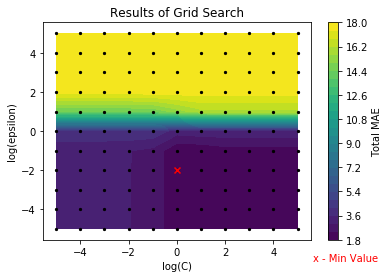

In [88]:
plt.contourf(np.log10(df_results['estimator__C'].values.reshape(11,11)), 
             np.log10(df_results['estimator__epsilon'].values.reshape(11,11)), 
             df_results['Total MAE'].values.reshape(11,11), 30)
cbar = plt.colorbar()
cbar.set_label('Total MAE')
plt.xlabel('log(C)')
plt.ylabel('log(epsilon)')
plt.title('Results of Grid Search')
plt.scatter(np.log10(df_results['estimator__C']), np.log10(df_results['estimator__epsilon']), c='k', s=5)
plt.scatter(np.log10(df_results['estimator__C'].iloc[df_results['Total MAE'].idxmin()]), 
            np.log10(df_results['estimator__epsilon'].iloc[df_results['Total MAE'].idxmin()]), 
            marker='x', c='r')
plt.figtext(0.9, 0.05, "x - Min Value",  color='r', ha ='right')
plt.show()

In [89]:
# use optimized parameters on full training and test set
svr4 = MultiOutputRegressor(SVR(kernel='rbf', gamma='scale', C=1, epsilon=0.01))

# initialize y_pred
Y_svr4_pred = np.empty((12,20))
    
# fit SVR model
svr4.fit(X_flatten_train, Ydot_flatten_train)

# create a local copy
X_pred = X_flatten_test.copy()

# loop over all months
for month in np.arange(12):

    # predict next rate of change
    Ydot_pred = svr4.predict(X_pred)

    # predict month
    if month==0:
        Y_svr4_pred[month] = (Ydot_pred/100 + 1) * y_train[:,-1]
    else:
        Y_svr4_pred[month] = (Ydot_pred/100 + 1) * Y_svr4_pred[month-1]

    # shift data by 20 to the left, append Ydot_pred, reshape to (1,240)
    X_pred = np.append(X_pred[:,20:], Ydot_pred).reshape(1,240)  
        
# Compute MAE SVR4 for 2019
mae_svr4 = [MAE(Y_svr4_pred[:,i], y_test[i]) for i in np.arange(df_mmor.shape[1])]
total_mae_svr4 = np.mean(mae_svr4)

print('MAE Support Vector Regression:')
for i in np.arange(len(mae_svr4)):
    print(df_mmor.columns[i],'{:.2f}'.format(mae_svr4[i]))
print('\nTotal MAE Support Vector Regression: {:.2f}'.format(total_mae_svr4))

MAE Support Vector Regression:
CP01 Switzerland 0.51
CP01 Germany 0.51
CP01 Romania 2.25
CP01 Turkey 5.27
CP01 United Kingdom 0.99
CP03 Switzerland 1.61
CP03 Germany 2.10
CP03 Romania 0.15
CP03 Turkey 9.59
CP03 United Kingdom 2.62
CP08 Switzerland 0.65
CP08 Germany 0.15
CP08 Romania 3.41
CP08 Turkey 0.78
CP08 United Kingdom 0.57
CP10 Switzerland 0.27
CP10 Germany 1.45
CP10 Romania 0.50
CP10 Turkey 5.98
CP10 United Kingdom 1.04

Total MAE Support Vector Regression: 2.02


### Random Forest Regressor
In step 3 we found out that the default parameters of the Random Forest Regressor gave the best performance with the least computational effort. So this time I omit the grid search.

In [90]:
rf4 = RandomForestRegressor(n_estimators=100, random_state=0)

# initialize y_pred
Y_rf4_pred = np.empty((12,20))
    
# fit RF model
rf4.fit(X_flatten_train, Ydot_flatten_train)

# create a local copy
X_pred = X_flatten_test.copy()

# loop over all months
for month in np.arange(12):

    # predict next rate of change
    Ydot_pred = rf4.predict(X_pred)

    # predict month
    if month==0:
        Y_rf4_pred[month] = (Ydot_pred/100 + 1) * y_train[:,-1]
    else:
        Y_rf4_pred[month] = (Ydot_pred/100 + 1) * Y_rf4_pred[month-1]

    # shift data by 20 to the left, append Ydot_pred, reshape to (1,240)
    X_pred = np.append(X_pred[:,20:], Ydot_pred).reshape(1,240)  
        
# Compute MAE RF4 for 2019
mae_rf4 = [MAE(Y_rf4_pred[:,i], y_test[i]) for i in np.arange(df_mmor.shape[1])]
total_mae_rf4 = np.mean(mae_rf4)

print('MAE Random Forest Regressor:')
for i in np.arange(len(mae_svr4)):
    print(df_mmor.columns[i],'{:.2f}'.format(mae_rf4[i]))
print('\nTotal MAE Random Forest Regressor: {:.2f}'.format(total_mae_rf4))

MAE Random Forest Regressor:
CP01 Switzerland 0.36
CP01 Germany 0.29
CP01 Romania 2.95
CP01 Turkey 5.16
CP01 United Kingdom 0.27
CP03 Switzerland 2.44
CP03 Germany 0.64
CP03 Romania 0.34
CP03 Turkey 6.36
CP03 United Kingdom 1.38
CP08 Switzerland 0.58
CP08 Germany 0.20
CP08 Romania 3.66
CP08 Turkey 1.07
CP08 United Kingdom 1.43
CP10 Switzerland 0.33
CP10 Germany 0.91
CP10 Romania 0.30
CP10 Turkey 6.01
CP10 United Kingdom 2.71

Total MAE Random Forest Regressor: 1.87


### Dense Neural Network with One Hidden Layer
The input dimension of a dense neural network corresponds to the number of columns in the feature matrix. As this number is much higher now I will repeat the variation of the number of neurons in the hidden layer:

0/1/2/3/4/5/

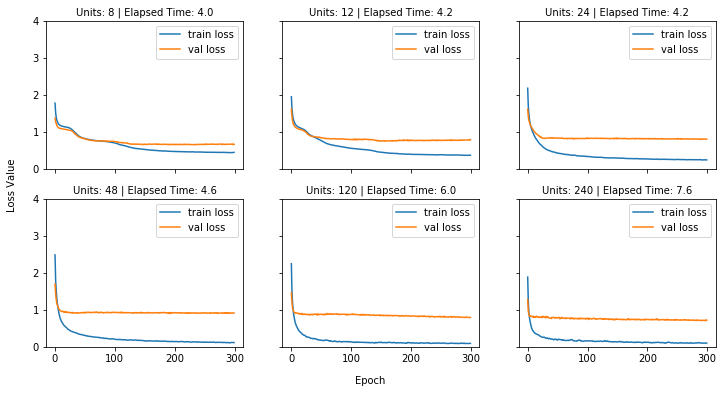

In [91]:
fig, axes = plt.subplots(2, 3, figsize=(12, 6), sharex=True, sharey=True)
fig.text(0.5, 0.04, 'Epoch', ha='center')
fig.text(0.08, 0.5, 'Loss Value', va='center', rotation='vertical')

count = 0       # loop counter

for nr_units,ax in zip([8,12,24,48,120,240], axes.ravel()):
    nn4 = Sequential()
    nn4.add(Dense(nr_units, activation='relu', input_dim=240))
    nn4.add(Dense(20))

    # Define loss function and optimizer to track during training
    nn4.compile(loss='mean_absolute_error', 
               optimizer=optimizers.Adam(lr=0.001)  # adjust learning rate if needed                   
    )

    # fit NN model
    start = time.time()
    history = nn4.fit(
        x=X_flatten_pretrain, y=Ydot_flatten_pretrain,               # pretrain set 
        validation_data=(X_flatten_train[-12:], Ydot_flatten_val),   # full year 2018
        batch_size=12,
        epochs=300,
        shuffle=True,
        #callbacks=[early_stopping],
        verbose=0
    )
    end = time.time()
    print(count, end='/')
    count += 1
    K.clear_session()            # very important: avoid memory blow-up

    # Plot convergence of loss values 
    ax.plot(history.history['loss'], label='train loss')
    ax.plot(history.history['val_loss'], label='val loss')
    ax.set_ylim((0,4))
    ax.set_title('Units: {} | Elapsed Time: {:.1f}'.format(nr_units, end-start), fontsize=10)
    ax.legend()

We see that there is no advantage in using a higher number of neurons. The model is overfitting on the pre-training set but the accuracy stays on the same level for the validation set. The computational effort increases with the number of units. So I will stick to 8:

In [92]:
# use 8 units
nn4 = Sequential()
nn4.add(Dense(8, activation='relu', input_dim=240))
nn4.add(Dense(20))
nn4.compile(loss='mean_absolute_error', optimizer='adam')

# initialize y_pred
Y_nn4_pred = np.empty((12,20))
    
# fit NN model for index i
nn4.fit(
    x=X_flatten_train, y=Ydot_flatten_train,
    batch_size=12,
    epochs=200,
    shuffle=True,
    verbose=0       # suppress output
)
    
# create a local copy
X_pred = X_flatten_test.copy()

# loop over all months
for month in np.arange(12):

    # predict next rate of change
    Ydot_pred = nn4.predict(X_pred)

    # predict month
    if month==0:
        Y_nn4_pred[month] = (Ydot_pred/100 + 1) * y_train[:,-1]
    else:
        Y_nn4_pred[month] = (Ydot_pred/100 + 1) * Y_nn4_pred[month-1]

    # shift data by 20 to the left, append Ydot_pred, reshape to (1,240)
    X_pred = np.append(X_pred[:,20:], Ydot_pred).reshape(1,240)
        
K.clear_session()
        
# Compute MAE NN4 for 2019
mae_nn4 = [MAE(Y_nn4_pred[:,i], y_test[i]) for i in np.arange(df_mmor.shape[1])]
total_mae_nn4 = np.mean(mae_nn4)

print('MAE Dense Neural Network:')
for i in np.arange(len(mae_nn4)):
    print(df_mmor.columns[i],'{:.2f}'.format(mae_nn4[i]))
print('\nTotal MAE Dense Neural Network: {:.2f}'.format(total_mae_nn4))

MAE Dense Neural Network:
CP01 Switzerland 0.65
CP01 Germany 0.63
CP01 Romania 2.96
CP01 Turkey 6.93
CP01 United Kingdom 0.60
CP03 Switzerland 2.24
CP03 Germany 3.81
CP03 Romania 0.21
CP03 Turkey 7.50
CP03 United Kingdom 0.76
CP08 Switzerland 0.56
CP08 Germany 0.28
CP08 Romania 3.20
CP08 Turkey 0.82
CP08 United Kingdom 1.60
CP10 Switzerland 0.31
CP10 Germany 1.21
CP10 Romania 1.06
CP10 Turkey 7.21
CP10 United Kingdom 0.45

Total MAE Dense Neural Network: 2.15


### Convolutional Neural Network (CNN)
For the CNN and for the LSTM there are two different possible setups for step 4. The first one uses the flattened feature matrix `X_flatten_train` with its 240 columns and gives a network like this:

In [93]:
cnn4 = Sequential()
cnn4.add(Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=(240, 1)))
cnn4.add(MaxPooling1D(pool_size=2))
cnn4.add(Flatten())
cnn4.add(Dense(32, activation='relu'))
cnn4.add(Dense(20))
cnn4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 236, 32)           192       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 118, 32)           0         
_________________________________________________________________
flatten (Flatten)            (None, 3776)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                120864    
_________________________________________________________________
dense_1 (Dense)              (None, 20)                660       
Total params: 121,716
Trainable params: 121,716
Non-trainable params: 0
_________________________________________________________________


The second version makes use of the third dimension. Therefore we can reuse the three-dimensional feature matrix `X_train` but need to reorder its axes to `(nr. samples, nr. lags, nr. indices)`. This approach feels more "natural" if we think about how filtering works. So I will try it out here:

In [94]:
cnn4 = Sequential()
cnn4.add(Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=(12, 20)))
cnn4.add(MaxPooling1D(pool_size=2))
cnn4.add(Flatten())
cnn4.add(Dense(32, activation='relu'))
cnn4.add(Dense(20))
cnn4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 8, 32)             3232      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 4, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 20)                660       
Total params: 8,020
Trainable params: 8,020
Non-trainable params: 0
_________________________________________________________________


In the summary we find that the number of parameters in the convolution layer is higher but the total number of parameters is much lower.

In [95]:
# HUGE PARAMETER VARIATION
# OUTPUT SAVED TO 'Data Project\CNN4'
# UNCOMMENT WITH Ctrl+/ IF YOU WANT TO RUN IT


# # parameter study of number of filters and kernel size

# # Make folder
# try:       
#     os.makedirs(os.path.join('Data Project', 'CNN4')) 
# except FileExistsError:
#     pass

# for nr_units in [8,16,32,64,128,256]:
#     print('\nNumber of units: ' + str(nr_units))

#     fig, axes = plt.subplots(3, 4, figsize=(12, 7), sharex=True, sharey=True)
#     fig.text(0.5, 0.06, 'Epoch', ha='center')
#     fig.text(0.2, 0.03, '8 filters', ha='center')
#     fig.text(0.4, 0.03, '16 filters', ha='center')
#     fig.text(0.6, 0.03, '32 filters', ha='center')
#     fig.text(0.8, 0.03, '64 filters', ha='center')
#     fig.text(0.08, 0.5, 'Loss Value', va='center', rotation='vertical')
#     fig.text(0.05, 0.25, 'kernel size 5', va='center', rotation='vertical')
#     fig.text(0.05, 0.5, 'kernel size 3', va='center', rotation='vertical')
#     fig.text(0.05, 0.75, 'kernel size 2', va='center', rotation='vertical')

#     for m, kernelsize in enumerate([2,3,5]):
#         for n, nr_filters in enumerate([8,16,32,64]):
#             cnn4 = Sequential()
#             cnn4.add(Conv1D(filters=nr_filters, kernel_size=kernelsize, activation='relu', input_shape=(12, 20)))
#             cnn4.add(MaxPooling1D(pool_size=2))
#             cnn4.add(Flatten())
#             cnn4.add(Dense(nr_units, activation='relu'))
#             #cnn4.add(Dropout(0.25))            # optional
#             cnn4.add(Dense(20))

#             # Define loss function and optimizer to track during training
#             cnn4.compile(loss='mean_absolute_error', 
#                        optimizer=optimizers.Adam(lr=0.001)  # adjust learning rate if needed                   
#             )


#             # fit CNN model
#             start = time.time()
#             history = cnn4.fit(
#                 x=X_pretrain.reshape(20,144,12).transpose(1,2,0),
#                 y=ydot_pretrain.T,                  # pretrain set 
#                 validation_data=(X_train[:,-12:].reshape(20,12,12).transpose(1,2,0), ydot_val.T),   # full year 2018
#                 batch_size=12,
#                 epochs=300,
#                 shuffle=True,
#                 #callbacks=[early_stopping],
#                 verbose=0
#             )
#             end = time.time()
#             print(4*m+n+1, end='/')
#             K.clear_session()            # very important: avoid memory blow-up

#             # Plot convergence of loss values 
#             axes[m,n].plot(history.history['loss'], label='train loss')
#             axes[m,n].plot(history.history['val_loss'], label='val loss')
#             axes[m,n].set_ylim((0,4))
#             axes[m,n].set_title('Elapsed Time: {:.1f}'.format(end-start), fontsize=10)
#             axes[m,n].legend()
#     plt.savefig(os.path.join('Data Project','CNN4','Units_'+str(nr_units)))
#     plt.close(fig)

In [96]:
# use 32 units, 32 filters, kernel size = 5 
cnn4 = Sequential()
cnn4.add(Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=(12, 20)))
cnn4.add(MaxPooling1D(pool_size=2))
cnn4.add(Flatten())
cnn4.add(Dense(32, activation='relu'))
cnn4.add(Dropout(0.25))
cnn4.add(Dense(20))
cnn4.compile(loss='mae', optimizer=optimizers.Adam(lr=0.001))

# initialize y_pred
Y_cnn4_pred = np.empty((12,20))

# fit CNN model
cnn4.fit(
    x=X_train.reshape(20,156,12).transpose(1,2,0),
    y=ydot_train.T,
    batch_size=12,
    epochs=300,
    shuffle=True,
    verbose=0       # suppress output
)

# create a local copy
X_pred = X_test.reshape(20,1,12).transpose(1,2,0).copy()

# inner loop over all months
for month in np.arange(12):

    # predict next rate of change
    Ydot_pred = cnn4.predict(X_pred)

    # predict month
    if month==0:
        Y_cnn4_pred[month] = (Ydot_pred/100 + 1) * y_train[:,-1]
    else:
        Y_cnn4_pred[month] = (Ydot_pred/100 + 1) * Y_cnn4_pred[month-1] 

    # shift data by 1 to the left, append Ydot_pred, reshape to (1,12,20)
    X_pred = np.append(X_pred[:,1:], Ydot_pred).reshape(1,12,20)  
        
K.clear_session()
        
# Compute MAE CNN4 for 2019
mae_cnn4 = [MAE(Y_cnn4_pred[:,i], y_test[i]) for i in np.arange(df_mmor.shape[1])]
total_mae_cnn4 = np.mean(mae_cnn4)

print('MAE Convolutional Neural Network:')
for i in np.arange(len(mae_cnn4)):
    print(df_mmor.columns[i],'{:.2f}'.format(mae_cnn4[i]))
print('\nTotal MAE Convolutional Neural Network: {:.2f}'.format(total_mae_cnn4))

MAE Convolutional Neural Network:
CP01 Switzerland 0.61
CP01 Germany 0.72
CP01 Romania 3.47
CP01 Turkey 4.69
CP01 United Kingdom 0.41
CP03 Switzerland 2.50
CP03 Germany 2.70
CP03 Romania 0.28
CP03 Turkey 6.49
CP03 United Kingdom 2.97
CP08 Switzerland 0.53
CP08 Germany 0.21
CP08 Romania 4.60
CP08 Turkey 0.93
CP08 United Kingdom 1.97
CP10 Switzerland 0.39
CP10 Germany 1.17
CP10 Romania 0.88
CP10 Turkey 7.29
CP10 United Kingdom 0.90

Total MAE Convolutional Neural Network: 2.19


### Recurrent Neural Network (LSTM)
For the LSTM model I will also make use of the third dimension:

1/2/3/4/5/6/7/8/9/10/11/12/

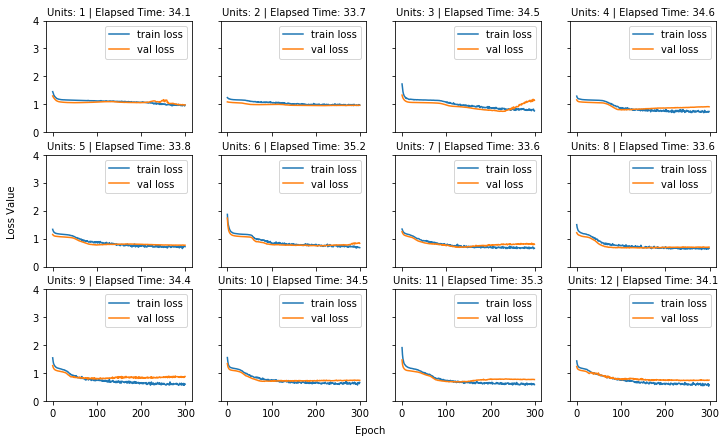

In [97]:
# parameter study of number of units

fig, axes = plt.subplots(3, 4, figsize=(12, 7), sharex=True, sharey=True)
fig.text(0.5, 0.06, 'Epoch', ha='center')
fig.text(0.08, 0.5, 'Loss Value', va='center', rotation='vertical')


for nr_units, ax in zip(np.arange(1,13), axes.ravel()):
    lstm4 = Sequential()
    lstm4.add(LSTM(nr_units, activation='relu', input_shape=(12,20)))
    lstm4.add(Dropout(1/6.0))     # optional
    lstm4.add(Dense(20))

    # Define loss function and optimizer to track during training
    lstm4.compile(loss='mean_absolute_error', 
               optimizer=optimizers.Adam(lr=0.001)  # adjust learning rate if needed                   
    )


    # fit LSTM model
    start = time.time()
    history = lstm4.fit(
        x=X_pretrain.reshape(20,144,12).transpose(1,2,0),
        y=ydot_pretrain.T,                  # pretrain set 
        validation_data=(X_train[:,-12:].reshape(20,12,12).transpose(1,2,0), ydot_val.T),   # full year 2018
        batch_size=12,
        epochs=300,
        shuffle=True,
        #callbacks=[early_stopping],
        verbose=0
    )
    end = time.time()
    print(nr_units, end='/')
    K.clear_session()            # very important: avoid memory blow-up

    # Plot convergence of loss values 
    ax.plot(history.history['loss'], label='train loss')
    ax.plot(history.history['val_loss'], label='val loss')
    ax.set_ylim((0,4))
    ax.set_title('Units: {:} | Elapsed Time: {:.1f}'.format(nr_units, end-start), fontsize=10)
    ax.legend()

In [98]:
# use 12 units
lstm4 = Sequential()
lstm4.add(LSTM(12, activation='relu', input_shape=(12,20)))
lstm4.add(Dropout(1/6.0))
lstm4.add(Dense(20))
lstm4.compile(loss='mae', optimizer=optimizers.Adam(lr=0.001))

# initialize y_pred
Y_lstm4_pred = np.empty((12,20))
    
# fit LSTM model
lstm4.fit(
    x=X_train.reshape(20,156,12).transpose(1,2,0),
    y=ydot_train.T,
    batch_size=12,
    epochs=300,
    shuffle=True,
    verbose=0       # suppress output
)

# create a local copy
X_pred = X_test.reshape(20,1,12).transpose(1,2,0).copy()

# inner loop over all months
for month in np.arange(12):

    # predict next rate of change
    Ydot_pred = lstm4.predict(X_pred)

    # predict month
    if month==0:
        Y_lstm4_pred[month] = (Ydot_pred/100 + 1) * y_train[:,-1]
    else:
        Y_lstm4_pred[month] = (Ydot_pred/100 + 1) * Y_lstm4_pred[month-1] 

    # shift data by 1 to the left, append Ydot_pred, reshape to (1,12,20)
    X_pred = np.append(X_pred[:,1:], Ydot_pred).reshape(1,12,20) 
        
K.clear_session()
        
# Compute MAE LSTM4 for 2019
mae_lstm4 = [MAE(Y_lstm4_pred[:,i], y_test[i]) for i in np.arange(df_mmor.shape[1])]
total_mae_lstm4 = np.mean(mae_lstm4)

print('MAE Recurrent Neural Network:')
for i in np.arange(len(mae_lstm4)):
    print(df_mmor.columns[i],'{:.2f}'.format(mae_lstm4[i]))
print('\nTotal MAE Recurrent Neural Network: {:.2f}'.format(total_mae_lstm4))

MAE Recurrent Neural Network:
CP01 Switzerland 0.62
CP01 Germany 0.24
CP01 Romania 2.25
CP01 Turkey 3.82
CP01 United Kingdom 0.48
CP03 Switzerland 2.94
CP03 Germany 2.47
CP03 Romania 0.38
CP03 Turkey 7.67
CP03 United Kingdom 1.42
CP08 Switzerland 0.51
CP08 Germany 0.21
CP08 Romania 4.66
CP08 Turkey 0.98
CP08 United Kingdom 1.89
CP10 Switzerland 0.39
CP10 Germany 1.24
CP10 Romania 0.66
CP10 Turkey 9.07
CP10 United Kingdom 0.63

Total MAE Recurrent Neural Network: 2.13


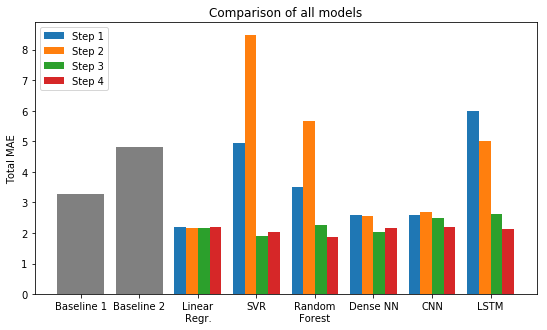

In [99]:
plt.figure(figsize=(9,5))
plt.bar(np.arange(2), [total_mae_baseline1, total_mae_baseline2], width=0.8, color='grey')
plt.bar(np.arange(2,8)-0.3, [total_mae_lr1, total_mae_svr1, total_mae_rf1,
                      total_mae_nn1, total_mae_cnn1, total_mae_lstm1], width=0.2, label='Step 1')
plt.bar(np.arange(2,8)-0.1, [total_mae_lr2, total_mae_svr2, total_mae_rf2,
                      total_mae_nn2, total_mae_cnn2, total_mae_lstm2], width=0.2, label='Step 2')
plt.bar(np.arange(2,8)+0.1, [total_mae_lr3, total_mae_svr3, total_mae_rf3,
                      total_mae_nn3, total_mae_cnn3, total_mae_lstm3], width=0.2, label='Step 3')
plt.bar(np.arange(2,8)+0.3, [total_mae_ridge4, total_mae_svr4, total_mae_rf4,
                      total_mae_nn4, total_mae_cnn4, total_mae_lstm4], width=0.2, label='Step 4')
plt.xticks(ticks=np.arange(8),
           labels=['Baseline 1', 'Baseline 2', 'Linear\nRegr.', 'SVR', 'Random\nForest', 'Dense NN', 'CNN', 'LSTM'])
plt.ylabel('Total MAE')
plt.legend(loc='upper left')
plt.title("Comparison of all models")
plt.show()

Again, I scaled all MAEs with the standard deviation $\sigma$, as discussed in the conclusion after step 1. But once again the qualitative difference is minor.

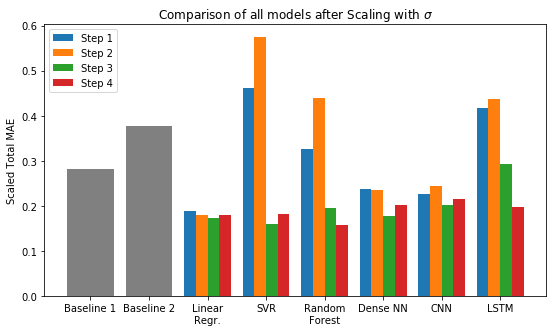

In [100]:
sigma = np.std(y_train, axis=1)       # array of all sigma[i]

plt.figure(figsize=(9,5))
plt.bar(np.arange(2), [np.mean(mae_baseline1/sigma), np.mean(mae_baseline2/sigma)], width=0.8, color='grey')
plt.bar(np.arange(2,8)-0.3, [np.mean(mae_lr1/sigma), np.mean(mae_svr1/sigma), np.mean(mae_rf1/sigma),
                             np.mean(mae_nn1/sigma), np.mean(mae_cnn1/sigma), np.mean(mae_lstm1/sigma)],
        width=0.2, label='Step 1')
plt.bar(np.arange(2,8)-0.1, [np.mean(mae_lr2/sigma), np.mean(mae_svr2/sigma), np.mean(mae_rf2/sigma),
                             np.mean(mae_nn2/sigma), np.mean(mae_cnn2/sigma), np.mean(mae_lstm2/sigma)],
        width=0.2, label='Step 2')
plt.bar(np.arange(2,8)+0.1, [np.mean(mae_lr3/sigma), np.mean(mae_svr3/sigma), np.mean(mae_rf3/sigma),
                             np.mean(mae_nn3/sigma), np.mean(mae_cnn3/sigma), np.mean(mae_lstm3/sigma)],
        width=0.2, label='Step 3')
plt.bar(np.arange(2,8)+0.3, [np.mean(mae_ridge4/sigma), np.mean(mae_svr4/sigma), np.mean(mae_rf4/sigma),
                             np.mean(mae_nn4/sigma), np.mean(mae_cnn4/sigma), np.mean(mae_lstm4/sigma)],
        width=0.2, label='Step 4')
plt.xticks(ticks=np.arange(8),
           labels=['Baseline 1', 'Baseline 2', 'Linear\nRegr.', 'SVR', 'Random\nForest', 'Dense NN', 'CNN', 'LSTM'])
plt.ylabel('Scaled Total MAE')
plt.legend(loc='upper left')
plt.title("Comparison of all models after Scaling with $\sigma$")
plt.show()

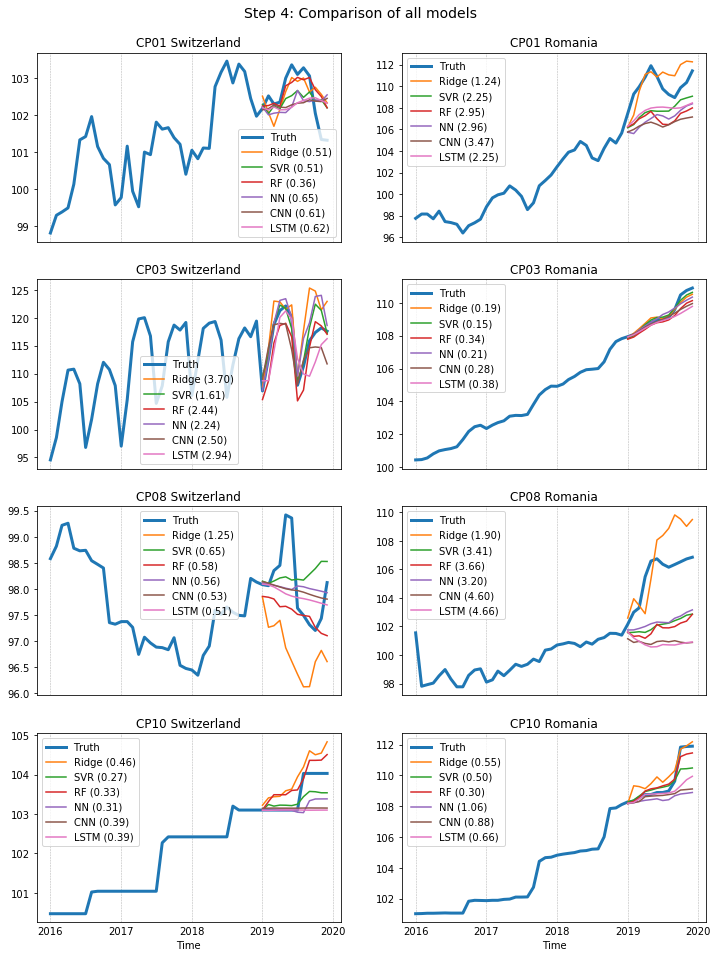

In [101]:
fig, axes = plt.subplots(4, 2, figsize=(12, 16), sharex=True)
plt.suptitle("Step 4: Comparison of all models", fontsize=14, y=0.92)
for i, ax in zip([0,2,5,7,10,12,15,17], axes.ravel()):
    ax.plot(df_task2.iloc[-48:,i], lw=3, label='Truth')
    ax.plot(df_task2.index[-12:], Y_ridge4_pred[:,i], label='Ridge ({:.2f})'.format(mae_ridge4[i]))
    ax.plot(df_task2.index[-12:], Y_svr4_pred[:,i], label='SVR ({:.2f})'.format(mae_svr4[i]))
    ax.plot(df_task2.index[-12:], Y_rf4_pred[:,i], label='RF ({:.2f})'.format(mae_rf4[i]))
    ax.plot(df_task2.index[-12:], Y_nn4_pred[:,i], label='NN ({:.2f})'.format(mae_nn4[i]))
    ax.plot(df_task2.index[-12:], Y_cnn4_pred[:,i], label='CNN ({:.2f})'.format(mae_cnn4[i]))
    ax.plot(df_task2.index[-12:], Y_lstm4_pred[:,i], label='LSTM ({:.2f})'.format(mae_lstm4[i]))
    
    ax.set_title(df_task2.columns[i])
    ax.set_xticks(['2016','2017','2018','2019','2020'])
    ax.grid(axis='x', linestyle='--', linewidth=0.5)
    ax.tick_params(axis='x', which='both', length=0)
    ax.legend()
    if i in [15,17]:
        ax.set_xlabel('Time')
plt.show()

### Conclusion of Step 4
The overall accuracy is quite good with this setup but it is not notably better than the setup in step 3. So we can conclude that the set of all indices does not contain more valuable training information than each single index on its own.

An advantage of this setup is that for all models it runs much faster than the loop over the 20 indices. On the other hand it seems that it is not so performant in predicting the stepwise increase in 'CP10'.


## Final Conclusion
During this part of the project I tried to predict the data of year 2019 out of the previous years by making use of machine learning. I tried out four different strategies (step 1-4), and for each out of them six different ML models. Many of the models showed a performance that was better than both baseline models but it was rather hard to push the total MAE below ~2. In the conclusion after step 1 I already mentioned that the dataset might be too small for training advanced models and that there are too many random effects in the data that cannot be predicted.

The rather basic **Linear Regression model** performed well with an unchanging accuracy for step 1-3 but needed additional regularization in the setup of step 4.

The advanced scikit-learn models **Support Vector Regression** and **Random Forest Regressor** only worked well when using the stationary rates of change as we did in step 3 and 4. Then they were even superior to the Linear Regression model.

The deep learning models of tensorflow also showed better performances when using stationary time series. But the major problem here was probably the limited amount of data. In theory **CNN** and **LSTM** models are highly elaborated models that should perform very well for these types of problems. But in my case even after a lot of variations they did not even reach the accuracy of the simple Linear Regression model. In addition I suffered a lot from their randomness: if I run the same setup twice I often got two very different results. Thus it was impossible during the parameter studies to judge which combination is the best.

So as a final conclusion I would say: ***Keep it simple!***<br>
If the dataset is as small as it was here, stick to a quick and simple model as the scikit-learn models. The use of deep learning models only makes sense if enough training data is available and if there is a good reason to believe that simpler models are not sufficient.